In [1]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
from sklearn.model_selection import train_test_split

In [2]:
import tsfresh

In [3]:
%load_ext autoreload
%autoreload 2
import CCPA_lib as cp


In [4]:
sns.set_context('poster')

In [5]:
ppallete = "BuGn"
porder = ['MIT9313', 'Natl2A', 'C9B', 'MIT9312', 'MED4']
pedge = 'green'
apallete = "Oranges"
aorder = ['1A3', 'DE', 'DE1', 'ATCC', 'BS11']
aedge='orange'              

In [6]:
df = pd.read_pickle('CCPA.pkl.gz')

In [7]:
dfc = df.loc[(df.experiment.isin(['e3', 'e4','e5', 'e6'])) & (df.culture == 'Co_Culture')]

In [8]:
dfw = df.loc[(df.experiment.isin(['e1','e3', 'e4','e5', 'e6'])) # & (df.culture == 'Co_Culture')
            ]

In [9]:
dfdecline = cp.generate_decline(dfw, scale=False)
dfdecline = dfdecline.loc[dfdecline['day'] <= 80]

In [10]:
n = 'exponential'
f = cp.model_exponential
t = dfdecline.groupby('experiment_sample').apply(lambda x: cp.apply_fit(x, f))
dfdecline[n] = t['y_pred']
dfdecline['decline'] = dfdecline.FL
dfdecline['exponential_diff'] = dfdecline.FL - dfdecline.exponential
dfdecline['decline_scaled'] = dfdecline.groupby('experiment_sample').FL.transform(lambda x: x / x.max())


[4.77705916 0.26920881 0.49436731 1.        ]
[4.77705916 0.26920881 0.49436731 1.        ]
[4.94853207 0.3032342  0.58365495 1.        ]
[5.03886748 0.30233981 0.51228273 1.        ]
[6.53189225 0.12554764 0.38946091 1.        ]
[5.98186974 0.14458317 0.37380244 1.        ]
[5.94895663 0.13151723 0.39936459 1.        ]
[1.75657963 0.17267606 0.13507994 1.        ]
[1.74068155 0.17824872 0.13246934 1.        ]
[1.64533003 0.15512337 0.14118677 1.        ]
[3.58363265 0.05911679 0.63733275 1.        ]
[3.73700341 0.04183195 0.4201448  1.        ]
[3.84054238 0.05882247 0.41996078 1.        ]
[3.32467768 0.23915212 0.95571866 1.        ]
[3.87908522 0.39246858 1.38301276 1.        ]
[3.82416059 0.38748352 1.36688274 1.        ]
[4.01711301 0.15293672 0.49883399 1.        ]
[4.56814085 0.13847523 0.50939917 1.        ]
[3.85217947 0.14104228 0.44461394 1.        ]
Optimal parameters not found: The maximum number of function evaluations is exceeded.
[6.04610466 0.07411101 0.47996345 1.    

C:\Users\wosnat\Anaconda3\lib\site-packages\scipy\optimize\_lsq\least_squares.py:214: RuntimeWarning: overflow encountered in square
  z = (f / f_scale) ** 2
C:\Users\wosnat\Anaconda3\lib\site-packages\scipy\optimize\_lsq\least_squares.py:214: RuntimeWarning: overflow encountered in square
  z = (f / f_scale) ** 2


[7.46765216 0.64029328 2.47986163 1.        ]
[5.74507504 0.38034126 2.6745029  1.        ]
[5.13309789 0.20703116 2.77224291 1.        ]
Optimal parameters not found: The maximum number of function evaluations is exceeded.
[6.2500873  0.05804373 0.66057154 1.        ]
[5.45108457 0.06184852 0.69690948 1.        ]
[5.3341516  0.06627177 0.6455757  1.        ]
[4.50505849 0.19728287 1.13264536 1.        ]
[6.48745698 0.25636134 1.68273243 1.        ]
[3.26650525 0.15413498 1.3084794  1.        ]
[6.15918227 0.17698189 0.83736462 1.        ]
[6.10266752 0.14743222 0.83205704 1.        ]
[7.04891931 0.16632625 0.74614376 1.        ]
[5.67772158 0.10881855 0.45905293 1.        ]
[5.65473181 0.14350215 0.42864432 1.        ]
[5.48553997 0.11480306 0.47718601 1.        ]
[1.31461884 0.14189023 0.11479708 1.        ]
[2.40219116 0.2962645  0.17138658 1.        ]
[2.12778065 0.32618286 0.19145849 1.        ]
[4.41226417 0.12028141 1.08853901 1.        ]
[4.93997839 0.11705004 0.99718364 1.    

[2.86430087 0.25529927 0.19585148 1.        ]
[2.33940489 0.2678131  0.23907759 1.        ]
[3.96966288 0.0966493  0.16855113 1.        ]
[2.79702018 0.13313263 0.13123267 1.        ]
[ 0.44323555  0.03602222 -0.06803418  1.        ]
[0.72893871 0.19377018 0.06093696 1.        ]
[1.38373016 0.23356233 0.07736266 1.        ]
[1.05568081 0.18249955 0.07228591 1.        ]
[1.99799169 0.0615963  0.03271595 1.        ]
[3.74465877 0.109408   0.25215219 1.        ]
[1.45561374 0.02646086 0.27540005 1.        ]
[1.29343499 0.02919698 0.38025212 1.        ]
[1.69872922 0.2073794  0.5768326  1.        ]
[3.13281726 0.25390217 0.1193629  1.        ]
[2.7937008  0.24972349 0.11447561 1.        ]
[3.1958254  0.14798256 0.09119147 1.        ]
[ 1.84359093  0.04247383 -0.14912932  1.        ]
[0.85330828 0.16973434 0.05150467 1.        ]
[1.56117943 0.15863801 0.0807733  1.        ]
[0.78592663 0.14991182 0.05893235 1.        ]
[3.57944526 0.37146809 0.23839494 1.        ]
[4.01311305 0.09362907 0.1

In [11]:
dfdecline.columns


Index(['experiment_sample', 'day', 'FL', 'experiment', 'sample', 'PRO', 'ALT',
       'culture', 'exponential', 'decline', 'exponential_diff',
       'decline_scaled'],
      dtype='object')

In [12]:
dfdecline.head()

,experiment_sample,day,FL,experiment,sample,PRO,ALT,culture,exponential,decline,exponential_diff,decline_scaled
0,"e1, 10A",0.000000,5.621,e1,10A,C9B,DE,Co_Culture,5.271426,5.621,0.349574,1.000000
1,"e1, 10A",0.893056,4.045,e1,10A,C9B,DE,Co_Culture,4.250563,4.045,-0.205563,0.719623
2,"e1, 10A",1.991667,2.749,e1,10A,C9B,DE,Co_Culture,3.288861,2.749,-0.539861,0.489059
3,"e1, 10A",4.697222,2.924,e1,10A,C9B,DE,Co_Culture,1.843270,2.924,1.080730,0.520192
4,"e1, 10A",5.700000,2.519,e1,10A,C9B,DE,Co_Culture,1.524137,2.519,0.994863,0.448141


In [13]:
features_df = cp.generate_features(dfw)

In [14]:
dfw.columns

Index(['day', 'experiment', 'sample', 'FL', 'PRO', 'ALT', 'culture', 'FL_orig',
       'logFL', 'cumsumFL', 'cumsumlogFL', 'zscoreFL', 'diffFL', 'difflogFL',
       'diffday', 'rateFL', 'ratelogFL', 'experiment_sample'],
      dtype='object')

In [15]:
ts_metadf = cp.get_meta(dfw)
ts_metadf.index = ts_metadf.experiment_sample
_y= ts_metadf.PRO + ','+ ts_metadf.ALT
ts_features_df = tsfresh.extract_relevant_features(
    dfw.loc[:, ['experiment_sample', 'FL', 'logFL', 'cumsumFL', 'cumsumlogFL', 'rateFL', 'ratelogFL', 'day']].fillna(0),
    _y,
     column_id='experiment_sample', column_kind=None, 
     column_sort='day', 
     #column_value=
    )


Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 20/20 [01:34<00:00,  1.97s/it]
 'FL__fft_coefficient__coeff_45__attr_"angle"'
 'FL__fft_coefficient__coeff_45__attr_"imag"' ...
 'ratelogFL__fft_coefficient__coeff_99__attr_"angle"'
 'ratelogFL__fft_coefficient__coeff_99__attr_"imag"'
 'ratelogFL__fft_coefficient__coeff_99__attr_"real"'] did not have any finite values. Filling with zeros.


In [16]:
ts_features_df.shape

(381, 1134)

In [17]:
dfdecline.columns

Index(['experiment_sample', 'day', 'FL', 'experiment', 'sample', 'PRO', 'ALT',
       'culture', 'exponential', 'decline', 'exponential_diff',
       'decline_scaled'],
      dtype='object')

In [18]:
ts_decline_metadf = cp.get_meta(dfdecline)
ts_decline_metadf.index = ts_decline_metadf.experiment_sample
_y= ts_decline_metadf.PRO + ','+ ts_decline_metadf.ALT
ts_decline_features_df = tsfresh.extract_relevant_features(
    dfdecline.loc[:, ['experiment_sample', 'day', 
       'exponential', 'decline', 'exponential_diff',
       'decline_scaled'] ].fillna(0),
    _y,
     column_id='experiment_sample', column_kind=None, 
     column_sort='day', 
     #column_value=
    )


Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:40<00:00,  1.03it/s]
 'decline__fft_coefficient__coeff_29__attr_"angle"'
 'decline__fft_coefficient__coeff_29__attr_"imag"' ...
 'exponential_diff__fft_coefficient__coeff_99__attr_"angle"'
 'exponential_diff__fft_coefficient__coeff_99__attr_"imag"'
 'exponential_diff__fft_coefficient__coeff_99__attr_"real"'] did not have any finite values. Filling with zeros.


# Compare Models

In [19]:
# compare models based on different experiment features
# value_col, 

value_col_list = ['FL', 'logFL', 'cumsumFL', 'cumsumlogFL']
#, 'zscoreFL', 'rateFL', 'ratelogFL']
resample_period_list = [None, '1d', '3d', '5d']
y_col_list = ['PRO', 'ALT', 'PRO_ALT']
cumsummode_list = [False, True]

In [20]:
def compare_models(df, value_col, resample_period_list, y_col_list, cumsummode_list, repetitions=10):
    # resample first
    stats_list = []
    for resample_period in resample_period_list:
        if resample_period is not None:
            d = cp.resample_df(df, value_col=value_col, period=resample_period)
        else:
            d = df
        metadf = cp.get_meta(d, value_col=value_col)
        for cumsummode in cumsummode_list:
            #print(resample_period, value_col, cumsummode)
            X = cp.experiments2X(d, value_col=value_col, cumsummode=cumsummode)
            
            resample_str = '_' + resample_period if resample_period is not None else ''
            cumsummode_str = '_cumsum' if cumsummode else ''
            for y_col in y_col_list:
                modelname = f'{y_col}_{value_col}{resample_str}{cumsummode_str}'
                for i in range(repetitions):
                    clf, res, _ = cp.ml(X=X, metadf=metadf, modelname=modelname, y_col=y_col)
                    res['value_col'] = value_col
                    res['resample_period'] = resample_period
                    res['y_col'] = y_col
                    res['cumsum'] = cumsummode
                    stats_list.append(res)
    return stats_list
            

In [21]:
def compare_models_features(df, y_col_list, repetitions=10):
    # resample first
    stats_list = []
    metadf = cp.get_meta(df, meta_col=['experiment_sample', 'experiment',
                                       'sample', 'PRO', 'ALT', 'culture'], 
                     value_col='max')
    X = cp.features2X(df)
    for y_col in y_col_list:
        modelname = f'{y_col}_features'
        for i in range(repetitions):
            clf, res, _ = cp.ml(X=X, metadf=metadf, modelname=modelname, y_col=y_col)
            res['value_col'] = 'features'
            res['resample_period'] = 'N/A'
            res['y_col'] = y_col
            res['cumsum'] = False
            stats_list.append(res)
    return stats_list

def compare_models_ts_features(df, metadf, y_col_list, mode='', repetitions=10):
    # resample first
    stats_list = []
    X = df
    for y_col in y_col_list:
        modelname = f'{y_col}_ts_features{mode}'
        for i in range(repetitions):
            clf, res, _ = cp.ml(X=X, metadf=metadf, modelname=modelname, y_col=y_col)
            res['value_col'] = f'ts_features{mode}'
            res['resample_period'] = 'N/A'
            res['y_col'] = y_col
            res['cumsum'] = False
            stats_list.append(res)
    return stats_list


In [22]:
value_col_list

['FL', 'logFL', 'cumsumFL', 'cumsumlogFL']

In [23]:
repetitions=10

In [24]:
stats_list = []
for i in value_col_list:
    res = compare_models(dfw, value_col=i, 
               resample_period_list=resample_period_list, 
               y_col_list=y_col_list, 
               cumsummode_list=cumsummode_list,
               repetitions=repetitions)
    stats_list.extend(res)


PRO_FL
train score 1.0
oob score 0.8617363344051447


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL
train score 1.0
oob score 0.8488745980707395


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL
train score 1.0
oob score 0.8488745980707395


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL
train score 1.0
oob score 0.8488745980707395


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL
train score 1.0
oob score 0.8360128617363344


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL
train score 1.0
oob score 0.8520900321543409


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL
train score 1.0
oob score 0.8360128617363344


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL
train score 1.0
oob score 0.842443729903537


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL
train score 1.0
oob score 0.8295819935691319


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL
train score 1.0
oob score 0.8585209003215434


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL
train score 1.0
oob score 0.5659163987138264


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL
train score 1.0
oob score 0.5691318327974276


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL
train score 1.0
oob score 0.5916398713826366


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL
train score 1.0
oob score 0.5852090032154341


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL
train score 1.0
oob score 0.6012861736334405


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL
train score 1.0
oob score 0.5787781350482315


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL
train score 1.0
oob score 0.5659163987138264


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL
train score 1.0
oob score 0.5594855305466238


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL
train score 1.0
oob score 0.572347266881029


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL
train score 1.0
oob score 0.5819935691318328


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL
train score 1.0
oob score 0.5434083601286174


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL
train score 1.0
oob score 0.5241157556270096


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL
train score 1.0
oob score 0.5594855305466238
PRO_ALT_FL
train score 1.0
oob score 0.572347266881029


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL
train score 1.0
oob score 0.5562700964630225


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL
train score 1.0
oob score 0.5241157556270096


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL
train score 1.0
oob score 0.5144694533762058


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL
train score 1.0
oob score 0.5112540192926045


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL
train score 1.0
oob score 0.5273311897106109


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL
train score 1.0
oob score 0.5401929260450161


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_cumsum
train score 1.0
oob score 0.7331189710610932


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_cumsum
train score 1.0
oob score 0.7491961414790996


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_cumsum
train score 1.0
oob score 0.7395498392282959


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_cumsum
train score 1.0
oob score 0.729903536977492


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_cumsum
train score 1.0
oob score 0.7106109324758842


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_cumsum
train score 1.0
oob score 0.7266881028938906


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_cumsum
train score 1.0
oob score 0.7491961414790996
PRO_FL_cumsum
train score 1.0
oob score 0.7202572347266881
PRO_FL_cumsum
train score 1.0
oob score 0.7427652733118971
PRO_FL_cumsum
train score 1.0
oob score 0.729903536977492


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_cumsum
train score 1.0
oob score 0.44694533762057875


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_cumsum
train score 1.0
oob score 0.4533762057877814
ALT_FL_cumsum
train score 1.0
oob score 0.42765273311897106


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_cumsum
train score 1.0
oob score 0.4180064308681672


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_cumsum
train score 1.0
oob score 0.42443729903536975
ALT_FL_cumsum
train score 1.0
oob score 0.4340836012861736
ALT_FL_cumsum
train score 1.0
oob score 0.44694533762057875
ALT_FL_cumsum
train score 1.0
oob score 0.44694533762057875


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_cumsum
train score 1.0
oob score 0.4340836012861736


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_cumsum
train score 1.0
oob score 0.4180064308681672
PRO_ALT_FL_cumsum
train score 1.0
oob score 0.41479099678456594
PRO_ALT_FL_cumsum
train score 1.0
oob score 0.4180064308681672


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL_cumsum
train score 1.0
oob score 0.42765273311897106


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL_cumsum
train score 1.0
oob score 0.4340836012861736
PRO_ALT_FL_cumsum
train score 1.0
oob score 0.3890675241157556


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL_cumsum
train score 1.0
oob score 0.42765273311897106


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL_cumsum
train score 1.0
oob score 0.42765273311897106


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL_cumsum
train score 1.0
oob score 0.4115755627009646
PRO_ALT_FL_cumsum
train score 1.0
oob score 0.4180064308681672


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL_cumsum
train score 1.0
oob score 0.40192926045016075
PRO_FL_1d
train score 1.0
oob score 0.8488745980707395


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_1d
train score 1.0
oob score 0.8360128617363344


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_1d
train score 1.0
oob score 0.8295819935691319


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_1d
train score 1.0
oob score 0.8553054662379421


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_1d
train score 1.0
oob score 0.8263665594855305


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_1d
train score 1.0
oob score 0.8231511254019293


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_1d
train score 1.0
oob score 0.8038585209003215


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_1d
train score 1.0
oob score 0.8520900321543409


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_1d
train score 1.0
oob score 0.8392282958199357


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_1d
train score 1.0
oob score 0.842443729903537


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_1d
train score 1.0
oob score 0.5916398713826366


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_1d
train score 1.0
oob score 0.5434083601286174


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_1d
train score 1.0
oob score 0.6141479099678456


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_1d
train score 1.0
oob score 0.5787781350482315


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_1d
train score 1.0
oob score 0.5691318327974276


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_1d
train score 1.0
oob score 0.5787781350482315


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_1d
train score 1.0
oob score 0.5852090032154341


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_1d
train score 1.0
oob score 0.5594855305466238


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_1d
train score 1.0
oob score 0.5659163987138264


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_1d
train score 1.0
oob score 0.5594855305466238


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL_1d
train score 1.0
oob score 0.4919614147909968


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL_1d
train score 1.0
oob score 0.5176848874598071
PRO_ALT_FL_1d
train score 1.0
oob score 0.5401929260450161


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL_1d
train score 1.0
oob score 0.5530546623794212


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL_1d
train score 1.0
oob score 0.5401929260450161


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL_1d
train score 1.0
oob score 0.4887459807073955
PRO_ALT_FL_1d
train score 1.0
oob score 0.5209003215434084


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL_1d
train score 1.0
oob score 0.5144694533762058


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL_1d
train score 1.0
oob score 0.5273311897106109


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL_1d
train score 1.0
oob score 0.5209003215434084


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_1d_cumsum
train score 1.0
oob score 0.7363344051446945


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_1d_cumsum
train score 1.0
oob score 0.7266881028938906
PRO_FL_1d_cumsum
train score 1.0
oob score 0.7491961414790996
PRO_FL_1d_cumsum
train score 1.0
oob score 0.752411575562701


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_1d_cumsum
train score 1.0
oob score 0.7491961414790996


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_1d_cumsum
train score 1.0
oob score 0.7427652733118971


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_1d_cumsum
train score 1.0
oob score 0.7556270096463023


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_1d_cumsum
train score 1.0
oob score 0.752411575562701


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_1d_cumsum
train score 1.0
oob score 0.7459807073954984


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_1d_cumsum
train score 1.0
oob score 0.7395498392282959


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_1d_cumsum
train score 1.0
oob score 0.4565916398713826
ALT_FL_1d_cumsum
train score 1.0
oob score 0.4565916398713826
ALT_FL_1d_cumsum
train score 1.0
oob score 0.4630225080385852
ALT_FL_1d_cumsum
train score 1.0
oob score 0.45980707395498394
ALT_FL_1d_cumsum
train score 1.0
oob score 0.45980707395498394


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_1d_cumsum
train score 1.0
oob score 0.45980707395498394
ALT_FL_1d_cumsum
train score 1.0
oob score 0.4694533762057878
ALT_FL_1d_cumsum
train score 1.0
oob score 0.4662379421221865
ALT_FL_1d_cumsum
train score 1.0
oob score 0.4694533762057878
ALT_FL_1d_cumsum
train score 1.0
oob score 0.4630225080385852
PRO_ALT_FL_1d_cumsum
train score 1.0
oob score 0.4212218649517685


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL_1d_cumsum
train score 1.0
oob score 0.42443729903536975
PRO_ALT_FL_1d_cumsum
train score 1.0
oob score 0.43086816720257237
PRO_ALT_FL_1d_cumsum
train score 1.0
oob score 0.40836012861736337
PRO_ALT_FL_1d_cumsum
train score 1.0
oob score 0.41479099678456594


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL_1d_cumsum
train score 1.0
oob score 0.45980707395498394
PRO_ALT_FL_1d_cumsum
train score 1.0
oob score 0.4340836012861736
PRO_ALT_FL_1d_cumsum
train score 1.0
oob score 0.44694533762057875
PRO_ALT_FL_1d_cumsum
train score 1.0
oob score 0.4340836012861736


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL_1d_cumsum
train score 1.0
oob score 0.42765273311897106


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_3d
train score 1.0
oob score 0.8231511254019293


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_3d
train score 1.0
oob score 0.8488745980707395


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_3d
train score 1.0
oob score 0.8456591639871383


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_3d
train score 1.0
oob score 0.8231511254019293


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_3d
train score 1.0
oob score 0.8360128617363344


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_3d
train score 1.0
oob score 0.8585209003215434


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_3d
train score 1.0
oob score 0.8392282958199357


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_3d
train score 1.0
oob score 0.8263665594855305


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_3d
train score 1.0
oob score 0.842443729903537


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_3d
train score 1.0
oob score 0.8392282958199357


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_3d
train score 1.0
oob score 0.5787781350482315


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_3d
train score 1.0
oob score 0.5466237942122186


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_3d
train score 1.0
oob score 0.5434083601286174


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_3d
train score 1.0
oob score 0.5916398713826366


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_3d
train score 1.0
oob score 0.5434083601286174


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_3d
train score 1.0
oob score 0.5241157556270096


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_3d
train score 1.0
oob score 0.5305466237942122


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_3d
train score 1.0
oob score 0.5466237942122186


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_3d
train score 1.0
oob score 0.5627009646302251


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_3d
train score 1.0
oob score 0.5498392282958199


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL_3d
train score 1.0
oob score 0.5209003215434084
PRO_ALT_FL_3d
train score 1.0
oob score 0.5273311897106109
PRO_ALT_FL_3d
train score 1.0
oob score 0.5048231511254019


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL_3d
train score 1.0
oob score 0.5337620578778135


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL_3d
train score 1.0
oob score 0.5112540192926045
PRO_ALT_FL_3d
train score 1.0
oob score 0.5273311897106109
PRO_ALT_FL_3d
train score 1.0
oob score 0.5401929260450161
PRO_ALT_FL_3d
train score 1.0
oob score 0.5080385852090032
PRO_ALT_FL_3d
train score 1.0
oob score 0.5401929260450161


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL_3d
train score 1.0
oob score 0.5209003215434084


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_3d_cumsum
train score 1.0
oob score 0.7331189710610932
PRO_FL_3d_cumsum
train score 1.0
oob score 0.7138263665594855
PRO_FL_3d_cumsum
train score 1.0
oob score 0.7363344051446945
PRO_FL_3d_cumsum
train score 1.0
oob score 0.7266881028938906
PRO_FL_3d_cumsum
train score 1.0
oob score 0.7395498392282959
PRO_FL_3d_cumsum
train score 1.0
oob score 0.752411575562701
PRO_FL_3d_cumsum
train score 1.0
oob score 0.7202572347266881
PRO_FL_3d_cumsum
train score 1.0
oob score 0.7331189710610932
PRO_FL_3d_cumsum
train score 1.0
oob score 0.7395498392282959


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_3d_cumsum
train score 1.0
oob score 0.7202572347266881


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_3d_cumsum
train score 1.0
oob score 0.45980707395498394


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_3d_cumsum
train score 1.0
oob score 0.44694533762057875
ALT_FL_3d_cumsum
train score 1.0
oob score 0.4565916398713826


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_3d_cumsum
train score 1.0
oob score 0.45016077170418006


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_3d_cumsum
train score 1.0
oob score 0.42765273311897106
ALT_FL_3d_cumsum
train score 1.0
oob score 0.4694533762057878
ALT_FL_3d_cumsum
train score 1.0
oob score 0.4340836012861736
ALT_FL_3d_cumsum
train score 1.0
oob score 0.4533762057877814


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_3d_cumsum
train score 1.0
oob score 0.4662379421221865


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_3d_cumsum
train score 1.0
oob score 0.4533762057877814


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL_3d_cumsum
train score 1.0
oob score 0.42765273311897106
PRO_ALT_FL_3d_cumsum
train score 1.0
oob score 0.4115755627009646
PRO_ALT_FL_3d_cumsum
train score 1.0
oob score 0.42443729903536975
PRO_ALT_FL_3d_cumsum
train score 1.0
oob score 0.4180064308681672
PRO_ALT_FL_3d_cumsum
train score 1.0
oob score 0.44694533762057875


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL_3d_cumsum
train score 1.0
oob score 0.4212218649517685
PRO_ALT_FL_3d_cumsum
train score 1.0
oob score 0.44694533762057875
PRO_ALT_FL_3d_cumsum
train score 1.0
oob score 0.4340836012861736
PRO_ALT_FL_3d_cumsum
train score 1.0
oob score 0.4340836012861736
PRO_ALT_FL_3d_cumsum
train score 1.0
oob score 0.4115755627009646


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_5d
train score 1.0
oob score 0.8456591639871383


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_5d
train score 1.0
oob score 0.8360128617363344


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_5d
train score 1.0
oob score 0.8488745980707395


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_5d
train score 1.0
oob score 0.8295819935691319


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_5d
train score 1.0
oob score 0.8520900321543409


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_5d
train score 1.0
oob score 0.8327974276527331


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_5d
train score 1.0
oob score 0.8520900321543409


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_5d
train score 1.0
oob score 0.8488745980707395


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_5d
train score 1.0
oob score 0.8263665594855305


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_5d
train score 1.0
oob score 0.842443729903537


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_5d
train score 1.0
oob score 0.5209003215434084


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_5d
train score 1.0
oob score 0.5466237942122186


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_5d
train score 1.0
oob score 0.5755627009646302


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_5d
train score 1.0
oob score 0.5916398713826366


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_5d
train score 1.0
oob score 0.5819935691318328


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_5d
train score 1.0
oob score 0.5369774919614148


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_5d
train score 1.0
oob score 0.5434083601286174


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_5d
train score 1.0
oob score 0.5241157556270096


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_5d
train score 1.0
oob score 0.5659163987138264


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_5d
train score 1.0
oob score 0.5627009646302251


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL_5d
train score 1.0
oob score 0.5144694533762058


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL_5d
train score 1.0
oob score 0.5016077170418006


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL_5d
train score 1.0
oob score 0.5080385852090032
PRO_ALT_FL_5d
train score 1.0
oob score 0.4983922829581994


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL_5d
train score 1.0
oob score 0.5144694533762058


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL_5d
train score 1.0
oob score 0.5176848874598071


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL_5d
train score 1.0
oob score 0.49517684887459806


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL_5d
train score 1.0
oob score 0.4983922829581994


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL_5d
train score 1.0
oob score 0.5112540192926045


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL_5d
train score 1.0
oob score 0.5176848874598071


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_5d_cumsum
train score 1.0
oob score 0.7202572347266881
PRO_FL_5d_cumsum
train score 1.0
oob score 0.7234726688102894
PRO_FL_5d_cumsum
train score 1.0
oob score 0.7266881028938906


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_5d_cumsum
train score 1.0
oob score 0.7138263665594855
PRO_FL_5d_cumsum
train score 1.0
oob score 0.6977491961414791
PRO_FL_5d_cumsum
train score 1.0
oob score 0.707395498392283
PRO_FL_5d_cumsum
train score 1.0
oob score 0.7106109324758842
PRO_FL_5d_cumsum
train score 1.0
oob score 0.7170418006430869
PRO_FL_5d_cumsum
train score 1.0
oob score 0.7234726688102894
PRO_FL_5d_cumsum
train score 1.0
oob score 0.6977491961414791
ALT_FL_5d_cumsum
train score 1.0
oob score 0.4437299035369775


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_5d_cumsum
train score 1.0
oob score 0.4758842443729904


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_5d_cumsum
train score 1.0
oob score 0.4758842443729904
ALT_FL_5d_cumsum
train score 1.0
oob score 0.45980707395498394
ALT_FL_5d_cumsum
train score 1.0
oob score 0.4887459807073955


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_5d_cumsum
train score 1.0
oob score 0.4437299035369775


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_5d_cumsum
train score 1.0
oob score 0.4565916398713826


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_5d_cumsum
train score 1.0
oob score 0.4437299035369775


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_5d_cumsum
train score 1.0
oob score 0.4340836012861736


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_5d_cumsum
train score 1.0
oob score 0.4694533762057878


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL_5d_cumsum
train score 1.0
oob score 0.42765273311897106
PRO_ALT_FL_5d_cumsum
train score 1.0
oob score 0.41479099678456594
PRO_ALT_FL_5d_cumsum
train score 1.0
oob score 0.4565916398713826
PRO_ALT_FL_5d_cumsum
train score 1.0
oob score 0.43729903536977494
PRO_ALT_FL_5d_cumsum
train score 1.0
oob score 0.4405144694533762
PRO_ALT_FL_5d_cumsum
train score 1.0
oob score 0.40514469453376206
PRO_ALT_FL_5d_cumsum
train score 1.0
oob score 0.40192926045016075
PRO_ALT_FL_5d_cumsum
train score 1.0
oob score 0.4212218649517685
PRO_ALT_FL_5d_cumsum
train score 1.0
oob score 0.4180064308681672
PRO_ALT_FL_5d_cumsum
train score 1.0
oob score 0.4340836012861736
PRO_logFL
train score 1.0
oob score 0.8553054662379421


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL
train score 1.0
oob score 0.8231511254019293


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL
train score 1.0
oob score 0.8456591639871383


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL
train score 1.0
oob score 0.8617363344051447


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL
train score 1.0
oob score 0.8553054662379421


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL
train score 1.0
oob score 0.8392282958199357


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL
train score 1.0
oob score 0.8488745980707395


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL
train score 1.0
oob score 0.842443729903537


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL
train score 1.0
oob score 0.8456591639871383


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL
train score 1.0
oob score 0.8520900321543409


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL
train score 1.0
oob score 0.5916398713826366


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL
train score 1.0
oob score 0.5916398713826366


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL
train score 1.0
oob score 0.594855305466238


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL
train score 1.0
oob score 0.5980707395498392


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL
train score 1.0
oob score 0.6045016077170418


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL
train score 1.0
oob score 0.594855305466238


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL
train score 1.0
oob score 0.5819935691318328


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL
train score 1.0
oob score 0.5884244372990354


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL
train score 1.0
oob score 0.594855305466238


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL
train score 1.0
oob score 0.5562700964630225


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL
train score 1.0
oob score 0.5241157556270096


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL
train score 1.0
oob score 0.5369774919614148


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL
train score 1.0
oob score 0.5401929260450161
PRO_ALT_logFL
train score 1.0
oob score 0.5434083601286174


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL
train score 1.0
oob score 0.5209003215434084


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL
train score 1.0
oob score 0.5209003215434084


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL
train score 1.0
oob score 0.5337620578778135


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL
train score 1.0
oob score 0.5369774919614148


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL
train score 1.0
oob score 0.5337620578778135


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL
train score 1.0
oob score 0.5273311897106109


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_cumsum
train score 1.0
oob score 0.7717041800643086


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_cumsum
train score 1.0
oob score 0.7781350482315113


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_cumsum
train score 1.0
oob score 0.7717041800643086


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_cumsum
train score 1.0
oob score 0.77491961414791


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_cumsum
train score 1.0
oob score 0.77491961414791


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_cumsum
train score 1.0
oob score 0.7845659163987139


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_cumsum
train score 1.0
oob score 0.7620578778135049


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_cumsum
train score 1.0
oob score 0.7652733118971061


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_cumsum
train score 1.0
oob score 0.7684887459807074


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_cumsum
train score 1.0
oob score 0.7588424437299035


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_cumsum
train score 1.0
oob score 0.4565916398713826


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_cumsum
train score 1.0
oob score 0.4405144694533762


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_cumsum
train score 1.0
oob score 0.43086816720257237


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_cumsum
train score 1.0
oob score 0.44694533762057875


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_cumsum
train score 1.0
oob score 0.41479099678456594


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_cumsum
train score 1.0
oob score 0.43086816720257237


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_cumsum
train score 1.0
oob score 0.4565916398713826


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_cumsum
train score 1.0
oob score 0.42443729903536975


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_cumsum
train score 1.0
oob score 0.43086816720257237


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_cumsum
train score 1.0
oob score 0.43729903536977494


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_cumsum
train score 1.0
oob score 0.42443729903536975


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_cumsum
train score 1.0
oob score 0.40192926045016075


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_cumsum
train score 1.0
oob score 0.4180064308681672


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_cumsum
train score 1.0
oob score 0.40836012861736337


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_cumsum
train score 1.0
oob score 0.42443729903536975


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_cumsum
train score 1.0
oob score 0.40192926045016075


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_cumsum
train score 1.0
oob score 0.40514469453376206


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_cumsum
train score 1.0
oob score 0.41479099678456594


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_cumsum
train score 1.0
oob score 0.40836012861736337


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_cumsum
train score 1.0
oob score 0.42443729903536975


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_1d
train score 1.0
oob score 0.8456591639871383


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_1d
train score 1.0
oob score 0.8327974276527331


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_1d
train score 1.0
oob score 0.8392282958199357


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_1d
train score 1.0
oob score 0.8520900321543409


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_1d
train score 1.0
oob score 0.8585209003215434


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_1d
train score 1.0
oob score 0.8327974276527331


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_1d
train score 1.0
oob score 0.8263665594855305


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_1d
train score 1.0
oob score 0.8488745980707395


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_1d
train score 1.0
oob score 0.8553054662379421


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_1d
train score 1.0
oob score 0.8392282958199357


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_1d
train score 1.0
oob score 0.5659163987138264


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_1d
train score 1.0
oob score 0.5787781350482315


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_1d
train score 1.0
oob score 0.5659163987138264


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_1d
train score 1.0
oob score 0.5530546623794212


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_1d
train score 1.0
oob score 0.5434083601286174


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_1d
train score 1.0
oob score 0.5562700964630225


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_1d
train score 1.0
oob score 0.5562700964630225


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_1d
train score 1.0
oob score 0.5819935691318328


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_1d
train score 1.0
oob score 0.5980707395498392


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_1d
train score 1.0
oob score 0.5434083601286174


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_1d
train score 1.0
oob score 0.4919614147909968


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_1d
train score 1.0
oob score 0.5369774919614148


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_1d
train score 1.0
oob score 0.5562700964630225


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_1d
train score 1.0
oob score 0.49517684887459806
PRO_ALT_logFL_1d
train score 1.0
oob score 0.5273311897106109


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_1d
train score 1.0
oob score 0.5434083601286174


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_1d
train score 1.0
oob score 0.5337620578778135


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_1d
train score 1.0
oob score 0.5209003215434084
PRO_ALT_logFL_1d
train score 1.0
oob score 0.5176848874598071


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_1d
train score 1.0
oob score 0.5273311897106109


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_1d_cumsum
train score 1.0
oob score 0.77491961414791


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_1d_cumsum
train score 1.0
oob score 0.77491961414791


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_1d_cumsum
train score 1.0
oob score 0.77491961414791


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_1d_cumsum
train score 1.0
oob score 0.7684887459807074


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_1d_cumsum
train score 1.0
oob score 0.7942122186495176


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_1d_cumsum
train score 1.0
oob score 0.7942122186495176


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_1d_cumsum
train score 1.0
oob score 0.797427652733119


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_1d_cumsum
train score 1.0
oob score 0.7909967845659164


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_1d_cumsum
train score 1.0
oob score 0.7684887459807074


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_1d_cumsum
train score 1.0
oob score 0.7813504823151125


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_1d_cumsum
train score 1.0
oob score 0.43729903536977494


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_1d_cumsum
train score 1.0
oob score 0.4340836012861736


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_1d_cumsum
train score 1.0
oob score 0.4565916398713826


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_1d_cumsum
train score 1.0
oob score 0.4180064308681672


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_1d_cumsum
train score 1.0
oob score 0.4630225080385852


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_1d_cumsum
train score 1.0
oob score 0.45016077170418006


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_1d_cumsum
train score 1.0
oob score 0.4405144694533762


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_1d_cumsum
train score 1.0
oob score 0.4790996784565916


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_1d_cumsum
train score 1.0
oob score 0.4533762057877814


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_1d_cumsum
train score 1.0
oob score 0.44694533762057875


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_1d_cumsum
train score 1.0
oob score 0.39228295819935693


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_1d_cumsum
train score 1.0
oob score 0.43086816720257237


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_1d_cumsum
train score 1.0
oob score 0.4212218649517685


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_1d_cumsum
train score 1.0
oob score 0.38263665594855306


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_1d_cumsum
train score 1.0
oob score 0.40836012861736337


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_1d_cumsum
train score 1.0
oob score 0.4405144694533762


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_1d_cumsum
train score 1.0
oob score 0.41479099678456594


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_1d_cumsum
train score 1.0
oob score 0.40514469453376206


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_1d_cumsum
train score 1.0
oob score 0.40192926045016075


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_1d_cumsum
train score 1.0
oob score 0.3954983922829582


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_3d
train score 1.0
oob score 0.8553054662379421


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_3d
train score 1.0
oob score 0.8456591639871383


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_3d
train score 1.0
oob score 0.8553054662379421


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_3d
train score 1.0
oob score 0.8553054662379421


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_3d
train score 1.0
oob score 0.8456591639871383


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_3d
train score 1.0
oob score 0.8488745980707395


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_3d
train score 1.0
oob score 0.8456591639871383


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_3d
train score 1.0
oob score 0.842443729903537


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_3d
train score 1.0
oob score 0.842443729903537


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_3d
train score 1.0
oob score 0.8360128617363344


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_3d
train score 1.0
oob score 0.5466237942122186


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_3d
train score 1.0
oob score 0.5530546623794212


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_3d
train score 1.0
oob score 0.5562700964630225


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_3d
train score 1.0
oob score 0.5369774919614148


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_3d
train score 1.0
oob score 0.5594855305466238


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_3d
train score 1.0
oob score 0.5337620578778135


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_3d
train score 1.0
oob score 0.5627009646302251


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_3d
train score 1.0
oob score 0.5369774919614148


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_3d
train score 1.0
oob score 0.5852090032154341


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_3d
train score 1.0
oob score 0.5691318327974276


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_3d
train score 1.0
oob score 0.5369774919614148
PRO_ALT_logFL_3d
train score 1.0
oob score 0.5241157556270096


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_3d
train score 1.0
oob score 0.5080385852090032
PRO_ALT_logFL_3d
train score 1.0
oob score 0.5048231511254019
PRO_ALT_logFL_3d
train score 1.0
oob score 0.5048231511254019
PRO_ALT_logFL_3d
train score 1.0
oob score 0.5016077170418006


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_3d
train score 1.0
oob score 0.5016077170418006


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_3d
train score 1.0
oob score 0.5048231511254019
PRO_ALT_logFL_3d
train score 1.0
oob score 0.5337620578778135
PRO_ALT_logFL_3d
train score 1.0
oob score 0.5241157556270096
PRO_logFL_3d_cumsum
train score 1.0
oob score 0.797427652733119


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_3d_cumsum
train score 1.0
oob score 0.7781350482315113


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_3d_cumsum
train score 1.0
oob score 0.77491961414791


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_3d_cumsum
train score 1.0
oob score 0.7877813504823151


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_3d_cumsum
train score 1.0
oob score 0.77491961414791


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_3d_cumsum
train score 1.0
oob score 0.7845659163987139


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_3d_cumsum
train score 1.0
oob score 0.7684887459807074


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_3d_cumsum
train score 1.0
oob score 0.7877813504823151


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_3d_cumsum
train score 1.0
oob score 0.7942122186495176


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_3d_cumsum
train score 1.0
oob score 0.7813504823151125


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_3d_cumsum
train score 1.0
oob score 0.4340836012861736


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_3d_cumsum
train score 1.0
oob score 0.4565916398713826


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_3d_cumsum
train score 1.0
oob score 0.4565916398713826


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_3d_cumsum
train score 1.0
oob score 0.4533762057877814


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_3d_cumsum
train score 1.0
oob score 0.42443729903536975


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_3d_cumsum
train score 1.0
oob score 0.4565916398713826


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_3d_cumsum
train score 1.0
oob score 0.4405144694533762


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_3d_cumsum
train score 1.0
oob score 0.4630225080385852


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_3d_cumsum
train score 1.0
oob score 0.44694533762057875


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_3d_cumsum
train score 1.0
oob score 0.4212218649517685


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_3d_cumsum
train score 1.0
oob score 0.3987138263665595


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_3d_cumsum
train score 1.0
oob score 0.3954983922829582


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_3d_cumsum
train score 1.0
oob score 0.39228295819935693


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_3d_cumsum
train score 1.0
oob score 0.40836012861736337


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_3d_cumsum
train score 1.0
oob score 0.39228295819935693


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_3d_cumsum
train score 1.0
oob score 0.3890675241157556


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_3d_cumsum
train score 1.0
oob score 0.42443729903536975


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_3d_cumsum
train score 1.0
oob score 0.40514469453376206


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_3d_cumsum
train score 1.0
oob score 0.40836012861736337


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_3d_cumsum
train score 1.0
oob score 0.3987138263665595


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_5d
train score 1.0
oob score 0.8392282958199357


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_5d
train score 1.0
oob score 0.864951768488746


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_5d
train score 1.0
oob score 0.8520900321543409


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_5d
train score 1.0
oob score 0.8392282958199357


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_5d
train score 1.0
oob score 0.8585209003215434


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_5d
train score 1.0
oob score 0.8456591639871383


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_5d
train score 1.0
oob score 0.8392282958199357


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_5d
train score 1.0
oob score 0.8585209003215434


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_5d
train score 1.0
oob score 0.8456591639871383


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_5d
train score 1.0
oob score 0.8553054662379421


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_5d
train score 1.0
oob score 0.5048231511254019


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_5d
train score 1.0
oob score 0.5434083601286174


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_5d
train score 1.0
oob score 0.5466237942122186


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_5d
train score 1.0
oob score 0.5627009646302251


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_5d
train score 1.0
oob score 0.5562700964630225


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_5d
train score 1.0
oob score 0.5080385852090032


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_5d
train score 1.0
oob score 0.5337620578778135


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_5d
train score 1.0
oob score 0.5466237942122186


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_5d
train score 1.0
oob score 0.5305466237942122


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_5d
train score 1.0
oob score 0.5466237942122186


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_5d
train score 1.0
oob score 0.5369774919614148


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_5d
train score 1.0
oob score 0.5112540192926045


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_5d
train score 1.0
oob score 0.5080385852090032


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_5d
train score 1.0
oob score 0.5048231511254019


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_5d
train score 1.0
oob score 0.5209003215434084


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_5d
train score 1.0
oob score 0.5112540192926045


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_5d
train score 1.0
oob score 0.4983922829581994


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_5d
train score 1.0
oob score 0.49517684887459806


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_5d
train score 1.0
oob score 0.49517684887459806


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_5d
train score 1.0
oob score 0.49517684887459806


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_5d_cumsum
train score 1.0
oob score 0.7942122186495176


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_5d_cumsum
train score 1.0
oob score 0.7491961414790996


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_5d_cumsum
train score 1.0
oob score 0.8135048231511254


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_5d_cumsum
train score 1.0
oob score 0.7845659163987139


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_5d_cumsum
train score 1.0
oob score 0.752411575562701


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_5d_cumsum
train score 1.0
oob score 0.7813504823151125


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_5d_cumsum
train score 1.0
oob score 0.7781350482315113


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_5d_cumsum
train score 1.0
oob score 0.7877813504823151


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_5d_cumsum
train score 1.0
oob score 0.7717041800643086


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_5d_cumsum
train score 1.0
oob score 0.7845659163987139


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_5d_cumsum
train score 1.0
oob score 0.4405144694533762


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_5d_cumsum
train score 1.0
oob score 0.4405144694533762


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_5d_cumsum
train score 1.0
oob score 0.43729903536977494


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_5d_cumsum
train score 1.0
oob score 0.4533762057877814


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_5d_cumsum
train score 1.0
oob score 0.4437299035369775


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_5d_cumsum
train score 1.0
oob score 0.42765273311897106


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_5d_cumsum
train score 1.0
oob score 0.4630225080385852


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_5d_cumsum
train score 1.0
oob score 0.44694533762057875


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_5d_cumsum
train score 1.0
oob score 0.43729903536977494


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_5d_cumsum
train score 1.0
oob score 0.43086816720257237


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_5d_cumsum
train score 1.0
oob score 0.3858520900321543


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_5d_cumsum
train score 1.0
oob score 0.3954983922829582


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_5d_cumsum
train score 1.0
oob score 0.40836012861736337


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_5d_cumsum
train score 1.0
oob score 0.40514469453376206


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_5d_cumsum
train score 1.0
oob score 0.3954983922829582


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_5d_cumsum
train score 1.0
oob score 0.40192926045016075


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_5d_cumsum
train score 1.0
oob score 0.3890675241157556


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_5d_cumsum
train score 1.0
oob score 0.3858520900321543


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_5d_cumsum
train score 1.0
oob score 0.40514469453376206


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_5d_cumsum
train score 1.0
oob score 0.3987138263665595


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL
train score 1.0
oob score 0.7877813504823151


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL
train score 1.0
oob score 0.7459807073954984


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL
train score 1.0
oob score 0.7717041800643086


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL
train score 1.0
oob score 0.7620578778135049


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL
train score 1.0
oob score 0.7427652733118971


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL
train score 1.0
oob score 0.7620578778135049


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL
train score 1.0
oob score 0.7588424437299035


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL
train score 1.0
oob score 0.7813504823151125


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL
train score 1.0
oob score 0.7491961414790996
PRO_cumsumFL
train score 1.0
oob score 0.7684887459807074
ALT_cumsumFL
train score 1.0
oob score 0.48231511254019294


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL
train score 1.0
oob score 0.49517684887459806


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL
train score 1.0
oob score 0.4405144694533762


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL
train score 1.0
oob score 0.4533762057877814


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL
train score 1.0
oob score 0.45980707395498394


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL
train score 1.0
oob score 0.45016077170418006


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL
train score 1.0
oob score 0.4565916398713826


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL
train score 1.0
oob score 0.45980707395498394


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL
train score 1.0
oob score 0.47266881028938906


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL
train score 1.0
oob score 0.44694533762057875


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL
train score 1.0
oob score 0.43086816720257237


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL
train score 1.0
oob score 0.4919614147909968


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL
train score 1.0
oob score 0.4694533762057878


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL
train score 1.0
oob score 0.4662379421221865


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL
train score 1.0
oob score 0.45980707395498394


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL
train score 1.0
oob score 0.4533762057877814


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL
train score 1.0
oob score 0.4405144694533762


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL
train score 1.0
oob score 0.4437299035369775


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL
train score 1.0
oob score 0.4565916398713826


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL
train score 1.0
oob score 0.4565916398713826


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_cumsum
train score 1.0
oob score 0.7234726688102894


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_cumsum
train score 1.0
oob score 0.729903536977492


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_cumsum
train score 1.0
oob score 0.7202572347266881


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_cumsum
train score 1.0
oob score 0.7427652733118971


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_cumsum
train score 1.0
oob score 0.7202572347266881


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_cumsum
train score 1.0
oob score 0.7395498392282959


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_cumsum
train score 1.0
oob score 0.707395498392283


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_cumsum
train score 1.0
oob score 0.7331189710610932


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_cumsum
train score 1.0
oob score 0.7331189710610932


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_cumsum
train score 1.0
oob score 0.7331189710610932


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_cumsum
train score 1.0
oob score 0.4405144694533762


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_cumsum
train score 1.0
oob score 0.4115755627009646


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_cumsum
train score 1.0
oob score 0.43086816720257237


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_cumsum
train score 1.0
oob score 0.43086816720257237


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_cumsum
train score 1.0
oob score 0.42765273311897106


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_cumsum
train score 1.0
oob score 0.43729903536977494


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_cumsum
train score 1.0
oob score 0.42765273311897106


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_cumsum
train score 1.0
oob score 0.43086816720257237


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_cumsum
train score 1.0
oob score 0.42765273311897106


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_cumsum
train score 1.0
oob score 0.42765273311897106


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_cumsum
train score 1.0
oob score 0.40514469453376206


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_cumsum
train score 1.0
oob score 0.40192926045016075


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_cumsum
train score 1.0
oob score 0.4115755627009646


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_cumsum
train score 1.0
oob score 0.4115755627009646


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_cumsum
train score 1.0
oob score 0.39228295819935693


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_cumsum
train score 1.0
oob score 0.3858520900321543


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_cumsum
train score 1.0
oob score 0.4115755627009646


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_cumsum
train score 1.0
oob score 0.40514469453376206


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_cumsum
train score 1.0
oob score 0.40514469453376206


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_cumsum
train score 1.0
oob score 0.3987138263665595


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_1d
train score 1.0
oob score 0.7363344051446945


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_1d
train score 1.0
oob score 0.7652733118971061


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_1d
train score 1.0
oob score 0.752411575562701


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_1d
train score 1.0
oob score 0.7620578778135049


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_1d
train score 1.0
oob score 0.7877813504823151


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_1d
train score 1.0
oob score 0.797427652733119


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_1d
train score 1.0
oob score 0.7491961414790996


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_1d
train score 1.0
oob score 0.7652733118971061


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_1d
train score 1.0
oob score 0.7684887459807074


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_1d
train score 1.0
oob score 0.7717041800643086


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_1d
train score 1.0
oob score 0.4758842443729904


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_1d
train score 1.0
oob score 0.45016077170418006


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_1d
train score 1.0
oob score 0.4565916398713826


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_1d
train score 1.0
oob score 0.4533762057877814


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_1d
train score 1.0
oob score 0.4855305466237942


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_1d
train score 1.0
oob score 0.4662379421221865


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_1d
train score 1.0
oob score 0.4694533762057878


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_1d
train score 1.0
oob score 0.4630225080385852


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_1d
train score 1.0
oob score 0.4694533762057878


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_1d
train score 1.0
oob score 0.45980707395498394


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_1d
train score 1.0
oob score 0.42443729903536975


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_1d
train score 1.0
oob score 0.4437299035369775


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_1d
train score 1.0
oob score 0.4533762057877814


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_1d
train score 1.0
oob score 0.45016077170418006


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_1d
train score 1.0
oob score 0.4405144694533762


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_1d
train score 1.0
oob score 0.44694533762057875


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_1d
train score 1.0
oob score 0.43729903536977494


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_1d
train score 1.0
oob score 0.4694533762057878


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_1d
train score 1.0
oob score 0.42765273311897106
PRO_ALT_cumsumFL_1d
train score 1.0
oob score 0.4662379421221865


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_1d_cumsum
train score 1.0
oob score 0.729903536977492


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_1d_cumsum
train score 1.0
oob score 0.729903536977492


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_1d_cumsum
train score 1.0
oob score 0.7331189710610932


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_1d_cumsum
train score 1.0
oob score 0.7266881028938906


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_1d_cumsum
train score 1.0
oob score 0.729903536977492


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_1d_cumsum
train score 1.0
oob score 0.7556270096463023


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_1d_cumsum
train score 1.0
oob score 0.7491961414790996


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_1d_cumsum
train score 1.0
oob score 0.7266881028938906


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_1d_cumsum
train score 1.0
oob score 0.7395498392282959


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_1d_cumsum
train score 1.0
oob score 0.7234726688102894


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_1d_cumsum
train score 1.0
oob score 0.4340836012861736


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_1d_cumsum
train score 1.0
oob score 0.4212218649517685


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_1d_cumsum
train score 1.0
oob score 0.43086816720257237


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_1d_cumsum
train score 1.0
oob score 0.4340836012861736


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_1d_cumsum
train score 1.0
oob score 0.42765273311897106


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_1d_cumsum
train score 1.0
oob score 0.45980707395498394


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_1d_cumsum
train score 1.0
oob score 0.4115755627009646


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_1d_cumsum
train score 1.0
oob score 0.42765273311897106


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_1d_cumsum
train score 1.0
oob score 0.41479099678456594


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_1d_cumsum
train score 1.0
oob score 0.45016077170418006


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_1d_cumsum
train score 1.0
oob score 0.4212218649517685


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_1d_cumsum
train score 1.0
oob score 0.43086816720257237


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_1d_cumsum
train score 1.0
oob score 0.4115755627009646


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_1d_cumsum
train score 1.0
oob score 0.4180064308681672


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_1d_cumsum
train score 1.0
oob score 0.42443729903536975


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_1d_cumsum
train score 1.0
oob score 0.4180064308681672


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_1d_cumsum
train score 1.0
oob score 0.3987138263665595


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_1d_cumsum
train score 1.0
oob score 0.41479099678456594


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_1d_cumsum
train score 1.0
oob score 0.4212218649517685


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_1d_cumsum
train score 1.0
oob score 0.4212218649517685


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_3d
train score 1.0
oob score 0.7652733118971061


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_3d
train score 1.0
oob score 0.7717041800643086


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_3d
train score 1.0
oob score 0.7363344051446945


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_3d
train score 1.0
oob score 0.7427652733118971


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_3d
train score 1.0
oob score 0.7556270096463023
PRO_cumsumFL_3d
train score 1.0
oob score 0.7363344051446945


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_3d
train score 1.0
oob score 0.7588424437299035


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_3d
train score 1.0
oob score 0.77491961414791


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_3d
train score 1.0
oob score 0.7459807073954984


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_3d
train score 1.0
oob score 0.7717041800643086


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_3d
train score 1.0
oob score 0.43729903536977494


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_3d
train score 1.0
oob score 0.4405144694533762


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_3d
train score 1.0
oob score 0.4405144694533762


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_3d
train score 1.0
oob score 0.44694533762057875


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_3d
train score 1.0
oob score 0.4662379421221865


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_3d
train score 1.0
oob score 0.4340836012861736


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_3d
train score 1.0
oob score 0.4437299035369775


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_3d
train score 1.0
oob score 0.42765273311897106


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_3d
train score 1.0
oob score 0.4340836012861736


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_3d
train score 1.0
oob score 0.42765273311897106


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_3d
train score 1.0
oob score 0.4212218649517685
PRO_ALT_cumsumFL_3d
train score 1.0
oob score 0.3987138263665595


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_3d
train score 1.0
oob score 0.44694533762057875


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_3d
train score 1.0
oob score 0.4340836012861736


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_3d
train score 1.0
oob score 0.43086816720257237


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_3d
train score 1.0
oob score 0.40836012861736337
PRO_ALT_cumsumFL_3d
train score 1.0
oob score 0.4437299035369775


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_3d
train score 1.0
oob score 0.40514469453376206


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_3d
train score 1.0
oob score 0.4180064308681672


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_3d
train score 1.0
oob score 0.4340836012861736


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_3d_cumsum
train score 1.0
oob score 0.729903536977492


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_3d_cumsum
train score 1.0
oob score 0.7331189710610932


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_3d_cumsum
train score 1.0
oob score 0.7041800643086816
PRO_cumsumFL_3d_cumsum
train score 1.0
oob score 0.7266881028938906


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_3d_cumsum
train score 1.0
oob score 0.7363344051446945


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_3d_cumsum
train score 1.0
oob score 0.7331189710610932


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_3d_cumsum
train score 1.0
oob score 0.7202572347266881


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_3d_cumsum
train score 1.0
oob score 0.7395498392282959


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_3d_cumsum
train score 1.0
oob score 0.729903536977492


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_3d_cumsum
train score 1.0
oob score 0.7234726688102894


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_3d_cumsum
train score 1.0
oob score 0.43086816720257237


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_3d_cumsum
train score 1.0
oob score 0.4212218649517685


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_3d_cumsum
train score 1.0
oob score 0.40514469453376206


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_3d_cumsum
train score 1.0
oob score 0.3954983922829582


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_3d_cumsum
train score 1.0
oob score 0.40514469453376206


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_3d_cumsum
train score 1.0
oob score 0.41479099678456594


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_3d_cumsum
train score 1.0
oob score 0.3987138263665595


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_3d_cumsum
train score 1.0
oob score 0.43729903536977494


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_3d_cumsum
train score 1.0
oob score 0.4180064308681672


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_3d_cumsum
train score 1.0
oob score 0.3987138263665595


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_3d_cumsum
train score 1.0
oob score 0.40514469453376206


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_3d_cumsum
train score 1.0
oob score 0.40836012861736337


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_3d_cumsum
train score 1.0
oob score 0.41479099678456594


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_3d_cumsum
train score 1.0
oob score 0.40192926045016075


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_3d_cumsum
train score 1.0
oob score 0.37942122186495175


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_3d_cumsum
train score 1.0
oob score 0.40514469453376206


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_3d_cumsum
train score 1.0
oob score 0.40192926045016075


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_3d_cumsum
train score 1.0
oob score 0.3858520900321543


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_3d_cumsum
train score 1.0
oob score 0.3762057877813505


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_3d_cumsum
train score 1.0
oob score 0.40192926045016075


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_5d
train score 1.0
oob score 0.7234726688102894


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_5d
train score 1.0
oob score 0.7459807073954984


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_5d
train score 1.0
oob score 0.7170418006430869


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_5d
train score 1.0
oob score 0.7363344051446945


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_5d
train score 1.0
oob score 0.7170418006430869


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_5d
train score 1.0
oob score 0.7459807073954984


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_5d
train score 1.0
oob score 0.7459807073954984


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_5d
train score 1.0
oob score 0.7491961414790996


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_5d
train score 1.0
oob score 0.752411575562701


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_5d
train score 1.0
oob score 0.7427652733118971
ALT_cumsumFL_5d
train score 1.0
oob score 0.41479099678456594


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_5d
train score 1.0
oob score 0.43086816720257237


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_5d
train score 1.0
oob score 0.41479099678456594


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_5d
train score 1.0
oob score 0.4565916398713826


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_5d
train score 1.0
oob score 0.43729903536977494


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_5d
train score 1.0
oob score 0.4533762057877814


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_5d
train score 1.0
oob score 0.4340836012861736


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_5d
train score 1.0
oob score 0.4405144694533762


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_5d
train score 1.0
oob score 0.4533762057877814


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_5d
train score 1.0
oob score 0.45980707395498394


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_5d
train score 1.0
oob score 0.4115755627009646


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_5d
train score 1.0
oob score 0.40192926045016075


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_5d
train score 1.0
oob score 0.3987138263665595
PRO_ALT_cumsumFL_5d
train score 1.0
oob score 0.40836012861736337


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_5d
train score 1.0
oob score 0.40514469453376206


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_5d
train score 1.0
oob score 0.4115755627009646


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_5d
train score 1.0
oob score 0.42443729903536975


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_5d
train score 1.0
oob score 0.42765273311897106


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_5d
train score 1.0
oob score 0.40836012861736337


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_5d
train score 1.0
oob score 0.40514469453376206


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_5d_cumsum
train score 1.0
oob score 0.7170418006430869


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_5d_cumsum
train score 1.0
oob score 0.7170418006430869


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_5d_cumsum
train score 1.0
oob score 0.7234726688102894


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_5d_cumsum
train score 1.0
oob score 0.7234726688102894


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_5d_cumsum
train score 1.0
oob score 0.729903536977492


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_5d_cumsum
train score 1.0
oob score 0.707395498392283


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_5d_cumsum
train score 1.0
oob score 0.7266881028938906


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_5d_cumsum
train score 1.0
oob score 0.7266881028938906


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_5d_cumsum
train score 1.0
oob score 0.7138263665594855


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_5d_cumsum
train score 1.0
oob score 0.7266881028938906


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_5d_cumsum
train score 1.0
oob score 0.4115755627009646


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_5d_cumsum
train score 1.0
oob score 0.42443729903536975


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_5d_cumsum
train score 1.0
oob score 0.43086816720257237


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_5d_cumsum
train score 1.0
oob score 0.4180064308681672


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_5d_cumsum
train score 1.0
oob score 0.40192926045016075


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_5d_cumsum
train score 1.0
oob score 0.4115755627009646


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_5d_cumsum
train score 1.0
oob score 0.4340836012861736


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_5d_cumsum
train score 1.0
oob score 0.4115755627009646


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_5d_cumsum
train score 1.0
oob score 0.4115755627009646


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_5d_cumsum
train score 1.0
oob score 0.43086816720257237


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_5d_cumsum
train score 1.0
oob score 0.38263665594855306


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_5d_cumsum
train score 1.0
oob score 0.37942122186495175


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_5d_cumsum
train score 1.0
oob score 0.3665594855305466


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_5d_cumsum
train score 1.0
oob score 0.3762057877813505


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_5d_cumsum
train score 1.0
oob score 0.3987138263665595


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_5d_cumsum
train score 1.0
oob score 0.40192926045016075


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_5d_cumsum
train score 1.0
oob score 0.39228295819935693


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_5d_cumsum
train score 1.0
oob score 0.39228295819935693


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_5d_cumsum
train score 1.0
oob score 0.37942122186495175


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_5d_cumsum
train score 1.0
oob score 0.3665594855305466


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL
train score 1.0
oob score 0.7652733118971061


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL
train score 1.0
oob score 0.7845659163987139


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL
train score 1.0
oob score 0.7781350482315113


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL
train score 1.0
oob score 0.77491961414791


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL
train score 1.0
oob score 0.7781350482315113


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL
train score 1.0
oob score 0.7845659163987139


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL
train score 1.0
oob score 0.7877813504823151


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL
train score 1.0
oob score 0.7813504823151125


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL
train score 1.0
oob score 0.8006430868167203


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL
train score 1.0
oob score 0.797427652733119


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL
train score 1.0
oob score 0.45016077170418006


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL
train score 1.0
oob score 0.45980707395498394


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL
train score 1.0
oob score 0.4437299035369775


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL
train score 1.0
oob score 0.42765273311897106


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL
train score 1.0
oob score 0.4565916398713826


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL
train score 1.0
oob score 0.45980707395498394


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL
train score 1.0
oob score 0.4630225080385852


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL
train score 1.0
oob score 0.43086816720257237


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL
train score 1.0
oob score 0.4533762057877814


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL
train score 1.0
oob score 0.45980707395498394


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL
train score 1.0
oob score 0.42443729903536975


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL
train score 1.0
oob score 0.42765273311897106
PRO_ALT_cumsumlogFL
train score 1.0
oob score 0.4340836012861736


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL
train score 1.0
oob score 0.4115755627009646


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL
train score 1.0
oob score 0.41479099678456594


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL
train score 1.0
oob score 0.4212218649517685


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL
train score 1.0
oob score 0.4212218649517685


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL
train score 1.0
oob score 0.43086816720257237


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL
train score 1.0
oob score 0.4115755627009646


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL
train score 1.0
oob score 0.42443729903536975


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_cumsum
train score 1.0
oob score 0.752411575562701


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_cumsum
train score 1.0
oob score 0.7459807073954984


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_cumsum
train score 1.0
oob score 0.7459807073954984


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_cumsum
train score 1.0
oob score 0.7363344051446945


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_cumsum
train score 1.0
oob score 0.7331189710610932


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_cumsum
train score 1.0
oob score 0.7491961414790996


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_cumsum
train score 1.0
oob score 0.7491961414790996


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_cumsum
train score 1.0
oob score 0.7427652733118971


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_cumsum
train score 1.0
oob score 0.752411575562701


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_cumsum
train score 1.0
oob score 0.7427652733118971


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_cumsum
train score 1.0
oob score 0.3954983922829582


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_cumsum
train score 1.0
oob score 0.3954983922829582


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_cumsum
train score 1.0
oob score 0.3987138263665595


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_cumsum
train score 1.0
oob score 0.3954983922829582


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_cumsum
train score 1.0
oob score 0.39228295819935693


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_cumsum
train score 1.0
oob score 0.4212218649517685


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_cumsum
train score 1.0
oob score 0.3858520900321543


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_cumsum
train score 1.0
oob score 0.40192926045016075


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_cumsum
train score 1.0
oob score 0.3954983922829582


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_cumsum
train score 1.0
oob score 0.42443729903536975


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_cumsum
train score 1.0
oob score 0.3762057877813505


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_cumsum
train score 1.0
oob score 0.35691318327974275


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_cumsum
train score 1.0
oob score 0.35691318327974275


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_cumsum
train score 1.0
oob score 0.3954983922829582


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_cumsum
train score 1.0
oob score 0.3762057877813505


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_cumsum
train score 1.0
oob score 0.36977491961414793


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_cumsum
train score 1.0
oob score 0.37942122186495175


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_cumsum
train score 1.0
oob score 0.38263665594855306


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_cumsum
train score 1.0
oob score 0.3665594855305466


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_cumsum
train score 1.0
oob score 0.35691318327974275


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_1d
train score 1.0
oob score 0.7813504823151125


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_1d
train score 1.0
oob score 0.7845659163987139


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_1d
train score 1.0
oob score 0.7942122186495176


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_1d
train score 1.0
oob score 0.7909967845659164


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_1d
train score 1.0
oob score 0.7877813504823151


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_1d
train score 1.0
oob score 0.8070739549839229


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_1d
train score 1.0
oob score 0.797427652733119


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_1d
train score 1.0
oob score 0.7877813504823151


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_1d
train score 1.0
oob score 0.7942122186495176


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_1d
train score 1.0
oob score 0.7909967845659164


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_1d
train score 1.0
oob score 0.4758842443729904


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_1d
train score 1.0
oob score 0.4533762057877814


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_1d
train score 1.0
oob score 0.4405144694533762


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_1d
train score 1.0
oob score 0.4437299035369775


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_1d
train score 1.0
oob score 0.45016077170418006


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_1d
train score 1.0
oob score 0.4340836012861736


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_1d
train score 1.0
oob score 0.45980707395498394


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_1d
train score 1.0
oob score 0.4565916398713826


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_1d
train score 1.0
oob score 0.4758842443729904


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_1d
train score 1.0
oob score 0.4340836012861736


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_1d
train score 1.0
oob score 0.40192926045016075


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_1d
train score 1.0
oob score 0.39228295819935693


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_1d
train score 1.0
oob score 0.40836012861736337


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_1d
train score 1.0
oob score 0.41479099678456594


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_1d
train score 1.0
oob score 0.4212218649517685


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_1d
train score 1.0
oob score 0.4115755627009646


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_1d
train score 1.0
oob score 0.4212218649517685


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_1d
train score 1.0
oob score 0.41479099678456594


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_1d
train score 1.0
oob score 0.4212218649517685


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_1d
train score 1.0
oob score 0.3987138263665595


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_1d_cumsum
train score 1.0
oob score 0.7491961414790996


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_1d_cumsum
train score 1.0
oob score 0.7588424437299035


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_1d_cumsum
train score 1.0
oob score 0.7363344051446945


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_1d_cumsum
train score 1.0
oob score 0.7459807073954984


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_1d_cumsum
train score 1.0
oob score 0.7363344051446945


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_1d_cumsum
train score 1.0
oob score 0.7588424437299035


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_1d_cumsum
train score 1.0
oob score 0.7556270096463023


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_1d_cumsum
train score 1.0
oob score 0.7556270096463023


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_1d_cumsum
train score 1.0
oob score 0.7459807073954984


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_1d_cumsum
train score 1.0
oob score 0.752411575562701


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_1d_cumsum
train score 1.0
oob score 0.39228295819935693


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_1d_cumsum
train score 1.0
oob score 0.4180064308681672


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_1d_cumsum
train score 1.0
oob score 0.37942122186495175


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_1d_cumsum
train score 1.0
oob score 0.40514469453376206


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_1d_cumsum
train score 1.0
oob score 0.38263665594855306


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_1d_cumsum
train score 1.0
oob score 0.40836012861736337


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_1d_cumsum
train score 1.0
oob score 0.3858520900321543


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_1d_cumsum
train score 1.0
oob score 0.40192926045016075


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_1d_cumsum
train score 1.0
oob score 0.3858520900321543


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_1d_cumsum
train score 1.0
oob score 0.3762057877813505


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_1d_cumsum
train score 1.0
oob score 0.3633440514469453


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_1d_cumsum
train score 1.0
oob score 0.37942122186495175


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_1d_cumsum
train score 1.0
oob score 0.39228295819935693


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_1d_cumsum
train score 1.0
oob score 0.3762057877813505


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_1d_cumsum
train score 1.0
oob score 0.3729903536977492


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_1d_cumsum
train score 1.0
oob score 0.3633440514469453


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_1d_cumsum
train score 1.0
oob score 0.3890675241157556


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_1d_cumsum
train score 1.0
oob score 0.36012861736334406


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_1d_cumsum
train score 1.0
oob score 0.3633440514469453


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_1d_cumsum
train score 1.0
oob score 0.39228295819935693


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_3d
train score 1.0
oob score 0.797427652733119


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_3d
train score 1.0
oob score 0.8070739549839229


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_3d
train score 1.0
oob score 0.7877813504823151


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_3d
train score 1.0
oob score 0.7781350482315113


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_3d
train score 1.0
oob score 0.7813504823151125


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_3d
train score 1.0
oob score 0.7909967845659164


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_3d
train score 1.0
oob score 0.7845659163987139


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_3d
train score 1.0
oob score 0.797427652733119


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_3d
train score 1.0
oob score 0.7877813504823151


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_3d
train score 1.0
oob score 0.7942122186495176


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_3d
train score 1.0
oob score 0.4630225080385852


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_3d
train score 1.0
oob score 0.4405144694533762


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_3d
train score 1.0
oob score 0.4533762057877814


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_3d
train score 1.0
oob score 0.4437299035369775


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_3d
train score 1.0
oob score 0.45016077170418006


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_3d
train score 1.0
oob score 0.43086816720257237


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_3d
train score 1.0
oob score 0.4533762057877814


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_3d
train score 1.0
oob score 0.42765273311897106


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_3d
train score 1.0
oob score 0.4630225080385852


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_3d
train score 1.0
oob score 0.4437299035369775


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_3d
train score 1.0
oob score 0.3987138263665595


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_3d
train score 1.0
oob score 0.4340836012861736


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_3d
train score 1.0
oob score 0.3890675241157556


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_3d
train score 1.0
oob score 0.42443729903536975


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_3d
train score 1.0
oob score 0.40514469453376206
PRO_ALT_cumsumlogFL_3d
train score 1.0
oob score 0.44694533762057875


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_3d
train score 1.0
oob score 0.4115755627009646


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_3d
train score 1.0
oob score 0.4180064308681672
PRO_ALT_cumsumlogFL_3d
train score 1.0
oob score 0.38263665594855306


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_3d
train score 1.0
oob score 0.40836012861736337


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_3d_cumsum
train score 1.0
oob score 0.7427652733118971


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_3d_cumsum
train score 1.0
oob score 0.7588424437299035


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_3d_cumsum
train score 1.0
oob score 0.752411575562701


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_3d_cumsum
train score 1.0
oob score 0.7556270096463023


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_3d_cumsum
train score 1.0
oob score 0.7652733118971061


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_3d_cumsum
train score 1.0
oob score 0.752411575562701


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_3d_cumsum
train score 1.0
oob score 0.7395498392282959


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_3d_cumsum
train score 1.0
oob score 0.7556270096463023


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_3d_cumsum
train score 1.0
oob score 0.7459807073954984


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_3d_cumsum
train score 1.0
oob score 0.7491961414790996


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_3d_cumsum
train score 1.0
oob score 0.37942122186495175


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_3d_cumsum
train score 1.0
oob score 0.40192926045016075


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_3d_cumsum
train score 1.0
oob score 0.41479099678456594


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_3d_cumsum
train score 1.0
oob score 0.40836012861736337


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_3d_cumsum
train score 1.0
oob score 0.40514469453376206


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_3d_cumsum
train score 1.0
oob score 0.40836012861736337


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_3d_cumsum
train score 1.0
oob score 0.3954983922829582


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_3d_cumsum
train score 1.0
oob score 0.3987138263665595


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_3d_cumsum
train score 1.0
oob score 0.35691318327974275


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_3d_cumsum
train score 1.0
oob score 0.4437299035369775


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_3d_cumsum
train score 1.0
oob score 0.38263665594855306


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_3d_cumsum
train score 1.0
oob score 0.3858520900321543
PRO_ALT_cumsumlogFL_3d_cumsum
train score 1.0
oob score 0.39228295819935693


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_3d_cumsum
train score 1.0
oob score 0.39228295819935693


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_3d_cumsum
train score 1.0
oob score 0.38263665594855306


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_3d_cumsum
train score 1.0
oob score 0.38263665594855306
PRO_ALT_cumsumlogFL_3d_cumsum
train score 1.0
oob score 0.3858520900321543


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_3d_cumsum
train score 1.0
oob score 0.40836012861736337


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_3d_cumsum
train score 1.0
oob score 0.3762057877813505


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_3d_cumsum
train score 1.0
oob score 0.3954983922829582


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_5d
train score 1.0
oob score 0.7717041800643086


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_5d
train score 1.0
oob score 0.7813504823151125


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_5d
train score 1.0
oob score 0.7781350482315113


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_5d
train score 1.0
oob score 0.8038585209003215


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_5d
train score 1.0
oob score 0.797427652733119


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_5d
train score 1.0
oob score 0.7909967845659164


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_5d
train score 1.0
oob score 0.7877813504823151


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_5d
train score 1.0
oob score 0.797427652733119


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_5d
train score 1.0
oob score 0.7942122186495176


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_5d
train score 1.0
oob score 0.8135048231511254


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_5d
train score 1.0
oob score 0.4437299035369775


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_5d
train score 1.0
oob score 0.4565916398713826


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_5d
train score 1.0
oob score 0.43086816720257237


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_5d
train score 1.0
oob score 0.4340836012861736


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_5d
train score 1.0
oob score 0.44694533762057875


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_5d
train score 1.0
oob score 0.4758842443729904


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_5d
train score 1.0
oob score 0.45980707395498394


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_5d
train score 1.0
oob score 0.4630225080385852


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_5d
train score 1.0
oob score 0.4565916398713826


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_5d
train score 1.0
oob score 0.45016077170418006


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_5d
train score 1.0
oob score 0.37942122186495175


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_5d
train score 1.0
oob score 0.40514469453376206
PRO_ALT_cumsumlogFL_5d
train score 1.0
oob score 0.3987138263665595


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_5d
train score 1.0
oob score 0.40836012861736337


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_5d
train score 1.0
oob score 0.3954983922829582
PRO_ALT_cumsumlogFL_5d
train score 1.0
oob score 0.4115755627009646


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_5d
train score 1.0
oob score 0.40514469453376206


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_5d
train score 1.0
oob score 0.40192926045016075


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_5d
train score 1.0
oob score 0.3954983922829582


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_5d
train score 1.0
oob score 0.3858520900321543


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_5d_cumsum
train score 1.0
oob score 0.7588424437299035


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_5d_cumsum
train score 1.0
oob score 0.752411575562701


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_5d_cumsum
train score 1.0
oob score 0.7588424437299035


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_5d_cumsum
train score 1.0
oob score 0.7652733118971061


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_5d_cumsum
train score 1.0
oob score 0.7652733118971061


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_5d_cumsum
train score 1.0
oob score 0.7459807073954984


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_5d_cumsum
train score 1.0
oob score 0.7395498392282959


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_5d_cumsum
train score 1.0
oob score 0.77491961414791


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_5d_cumsum
train score 1.0
oob score 0.7684887459807074


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_5d_cumsum
train score 1.0
oob score 0.77491961414791


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_5d_cumsum
train score 1.0
oob score 0.40514469453376206


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_5d_cumsum
train score 1.0
oob score 0.40192926045016075


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_5d_cumsum
train score 1.0
oob score 0.4212218649517685


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_5d_cumsum
train score 1.0
oob score 0.4115755627009646


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_5d_cumsum
train score 1.0
oob score 0.39228295819935693


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_5d_cumsum
train score 1.0
oob score 0.40192926045016075


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_5d_cumsum
train score 1.0
oob score 0.40514469453376206


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_5d_cumsum
train score 1.0
oob score 0.40514469453376206


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_5d_cumsum
train score 1.0
oob score 0.3890675241157556


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_5d_cumsum
train score 1.0
oob score 0.39228295819935693


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_5d_cumsum
train score 1.0
oob score 0.3987138263665595


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_5d_cumsum
train score 1.0
oob score 0.39228295819935693


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_5d_cumsum
train score 1.0
oob score 0.37942122186495175


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_5d_cumsum
train score 1.0
oob score 0.3890675241157556


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_5d_cumsum
train score 1.0
oob score 0.38263665594855306


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_5d_cumsum
train score 1.0
oob score 0.3729903536977492


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_5d_cumsum
train score 1.0
oob score 0.36977491961414793


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_5d_cumsum
train score 1.0
oob score 0.38263665594855306


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_5d_cumsum
train score 1.0
oob score 0.36977491961414793


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_5d_cumsum
train score 1.0
oob score 0.3890675241157556


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
#stats_list = []
decline_col_list = ['exponential', 'decline', 'exponential_diff', 'decline_scaled']
for i in decline_col_list:
    res = compare_models(dfdecline, value_col=i, 
               resample_period_list=resample_period_list, 
               y_col_list=y_col_list, 
               cumsummode_list=cumsummode_list,
               repetitions=repetitions)
    stats_list.extend(res)


PRO_exponential
train score 1.0
oob score 0.5691318327974276
PRO_exponential
train score 1.0
oob score 0.5852090032154341
PRO_exponential
train score 1.0
oob score 0.5819935691318328
PRO_exponential
train score 1.0
oob score 0.5852090032154341
PRO_exponential
train score 1.0
oob score 0.5819935691318328
PRO_exponential
train score 1.0
oob score 0.5852090032154341


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential
train score 1.0
oob score 0.594855305466238
PRO_exponential
train score 1.0
oob score 0.6045016077170418
PRO_exponential
train score 1.0
oob score 0.6077170418006431
PRO_exponential
train score 1.0
oob score 0.6045016077170418
ALT_exponential
train score 1.0
oob score 0.39228295819935693
ALT_exponential
train score 1.0
oob score 0.4405144694533762
ALT_exponential
train score 1.0
oob score 0.41479099678456594
ALT_exponential
train score 1.0
oob score 0.42765273311897106
ALT_exponential
train score 1.0
oob score 0.3858520900321543
ALT_exponential
train score 1.0
oob score 0.4180064308681672


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential
train score 1.0
oob score 0.40514469453376206
ALT_exponential
train score 1.0
oob score 0.4115755627009646
ALT_exponential
train score 1.0
oob score 0.42765273311897106


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential
train score 1.0
oob score 0.3987138263665595


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_exponential
train score 1.0
oob score 0.33762057877813506
PRO_ALT_exponential
train score 1.0
oob score 0.3183279742765273
PRO_ALT_exponential
train score 1.0
oob score 0.3183279742765273
PRO_ALT_exponential
train score 1.0
oob score 0.3408360128617363
PRO_ALT_exponential
train score 1.0
oob score 0.3247588424437299
PRO_ALT_exponential
train score 1.0
oob score 0.3086816720257235
PRO_ALT_exponential
train score 1.0
oob score 0.34726688102893893
PRO_ALT_exponential
train score 1.0
oob score 0.3247588424437299
PRO_ALT_exponential
train score 1.0
oob score 0.3504823151125402
PRO_ALT_exponential
train score 1.0
oob score 0.3504823151125402
PRO_exponential_cumsum
train score 1.0
oob score 0.572347266881029


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_cumsum
train score 1.0
oob score 0.5819935691318328
PRO_exponential_cumsum
train score 0.9967845659163987
oob score 0.5691318327974276
PRO_exponential_cumsum
train score 1.0
oob score 0.5755627009646302


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_cumsum
train score 1.0
oob score 0.5884244372990354
PRO_exponential_cumsum
train score 1.0
oob score 0.5884244372990354
PRO_exponential_cumsum
train score 1.0
oob score 0.5852090032154341
PRO_exponential_cumsum
train score 1.0
oob score 0.5594855305466238
PRO_exponential_cumsum
train score 1.0
oob score 0.5659163987138264


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_cumsum
train score 1.0
oob score 0.5787781350482315


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_cumsum
train score 1.0
oob score 0.3504823151125402


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_cumsum
train score 1.0
oob score 0.3408360128617363


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_cumsum
train score 1.0
oob score 0.3536977491961415


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_cumsum
train score 1.0
oob score 0.3536977491961415


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_cumsum
train score 1.0
oob score 0.3536977491961415


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_cumsum
train score 1.0
oob score 0.3408360128617363


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_cumsum
train score 1.0
oob score 0.35691318327974275


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_cumsum
train score 1.0
oob score 0.35691318327974275


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_cumsum
train score 1.0
oob score 0.36012861736334406


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_cumsum
train score 1.0
oob score 0.31511254019292606


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


PRO_ALT_exponential_cumsum
train score 1.0
oob score 0.27009646302250806
PRO_ALT_exponential_cumsum
train score 1.0
oob score 0.2765273311897106
PRO_ALT_exponential_cumsum
train score 1.0
oob score 0.27009646302250806
PRO_ALT_exponential_cumsum
train score 1.0
oob score 0.2733118971061093
PRO_ALT_exponential_cumsum
train score 1.0
oob score 0.2540192926045016
PRO_ALT_exponential_cumsum
train score 1.0
oob score 0.26688102893890675
PRO_ALT_exponential_cumsum
train score 1.0
oob score 0.26688102893890675
PRO_ALT_exponential_cumsum
train score 1.0
oob score 0.2604501607717042
PRO_ALT_exponential_cumsum
train score 1.0
oob score 0.2765273311897106
PRO_ALT_exponential_cumsum
train score 1.0
oob score 0.28938906752411575
PRO_exponential_1d
train score 1.0
oob score 0.6077170418006431
PRO_exponential_1d
train score 1.0
oob score 0.5819935691318328


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_1d
train score 1.0
oob score 0.5819935691318328


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_1d
train score 1.0
oob score 0.594855305466238


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_1d
train score 1.0
oob score 0.5980707395498392


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_1d
train score 1.0
oob score 0.5852090032154341


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_1d
train score 1.0
oob score 0.594855305466238


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_1d
train score 1.0
oob score 0.5916398713826366


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_1d
train score 1.0
oob score 0.5916398713826366


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_1d
train score 1.0
oob score 0.6045016077170418


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_1d
train score 1.0
oob score 0.36977491961414793


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_1d
train score 1.0
oob score 0.38263665594855306


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_1d
train score 1.0
oob score 0.3954983922829582
ALT_exponential_1d
train score 1.0
oob score 0.3729903536977492


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_1d
train score 1.0
oob score 0.3858520900321543
ALT_exponential_1d
train score 1.0
oob score 0.3858520900321543
ALT_exponential_1d
train score 1.0
oob score 0.3665594855305466


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_1d
train score 1.0
oob score 0.3954983922829582


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_1d
train score 1.0
oob score 0.4180064308681672


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_1d
train score 1.0
oob score 0.36977491961414793
PRO_ALT_exponential_1d
train score 1.0
oob score 0.3247588424437299
PRO_ALT_exponential_1d
train score 1.0
oob score 0.31511254019292606
PRO_ALT_exponential_1d
train score 1.0
oob score 0.3022508038585209
PRO_ALT_exponential_1d
train score 1.0
oob score 0.3022508038585209
PRO_ALT_exponential_1d
train score 1.0
oob score 0.3022508038585209
PRO_ALT_exponential_1d
train score 1.0
oob score 0.3022508038585209
PRO_ALT_exponential_1d
train score 1.0
oob score 0.31189710610932475
PRO_ALT_exponential_1d
train score 1.0
oob score 0.3183279742765273
PRO_ALT_exponential_1d
train score 1.0
oob score 0.3183279742765273
PRO_ALT_exponential_1d
train score 1.0
oob score 0.33762057877813506
PRO_exponential_1d_cumsum
train score 1.0
oob score 0.5787781350482315
PRO_exponential_1d_cumsum
train score 1.0
oob score 0.594855305466238
PRO_exponential_1d_cumsum
train score 1.0
oob score 0.5852090032154341
PRO_exponential_1d_cumsum
train score 1.

C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_1d_cumsum
train score 1.0
oob score 0.3729903536977492


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_1d_cumsum
train score 1.0
oob score 0.3890675241157556


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_1d_cumsum
train score 1.0
oob score 0.3858520900321543


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_1d_cumsum
train score 1.0
oob score 0.40192926045016075


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_1d_cumsum
train score 1.0
oob score 0.3987138263665595


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_1d_cumsum
train score 1.0
oob score 0.35691318327974275


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_1d_cumsum
train score 1.0
oob score 0.38263665594855306


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_1d_cumsum
train score 1.0
oob score 0.3633440514469453


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_1d_cumsum
train score 1.0
oob score 0.38263665594855306


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


PRO_ALT_exponential_1d_cumsum
train score 1.0
oob score 0.2540192926045016
PRO_ALT_exponential_1d_cumsum
train score 1.0
oob score 0.27009646302250806
PRO_ALT_exponential_1d_cumsum
train score 1.0
oob score 0.2540192926045016
PRO_ALT_exponential_1d_cumsum
train score 1.0
oob score 0.27009646302250806
PRO_ALT_exponential_1d_cumsum
train score 1.0
oob score 0.27009646302250806
PRO_ALT_exponential_1d_cumsum
train score 1.0
oob score 0.2797427652733119
PRO_ALT_exponential_1d_cumsum
train score 1.0
oob score 0.2508038585209003
PRO_ALT_exponential_1d_cumsum
train score 1.0
oob score 0.2604501607717042
PRO_ALT_exponential_1d_cumsum
train score 1.0
oob score 0.2797427652733119
PRO_ALT_exponential_1d_cumsum
train score 1.0
oob score 0.2604501607717042
PRO_exponential_3d
train score 1.0
oob score 0.572347266881029
PRO_exponential_3d
train score 1.0
oob score 0.5787781350482315


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_3d
train score 1.0
oob score 0.5884244372990354


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_3d
train score 1.0
oob score 0.5852090032154341
PRO_exponential_3d
train score 1.0
oob score 0.5787781350482315
PRO_exponential_3d
train score 1.0
oob score 0.5819935691318328


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_3d
train score 1.0
oob score 0.5755627009646302
PRO_exponential_3d
train score 1.0
oob score 0.5916398713826366
PRO_exponential_3d
train score 1.0
oob score 0.5627009646302251
PRO_exponential_3d
train score 1.0
oob score 0.5916398713826366


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_3d
train score 1.0
oob score 0.37942122186495175


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_3d
train score 1.0
oob score 0.3762057877813505
ALT_exponential_3d
train score 1.0
oob score 0.36012861736334406


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_3d
train score 1.0
oob score 0.3987138263665595


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_3d
train score 1.0
oob score 0.4115755627009646


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_3d
train score 1.0
oob score 0.37942122186495175


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_3d
train score 1.0
oob score 0.39228295819935693


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_3d
train score 1.0
oob score 0.3954983922829582


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_3d
train score 1.0
oob score 0.40514469453376206
ALT_exponential_3d
train score 1.0
oob score 0.3890675241157556


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_exponential_3d
train score 1.0
oob score 0.3279742765273312
PRO_ALT_exponential_3d
train score 1.0
oob score 0.2765273311897106
PRO_ALT_exponential_3d
train score 1.0
oob score 0.31511254019292606


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_exponential_3d
train score 1.0
oob score 0.2990353697749196
PRO_ALT_exponential_3d
train score 1.0
oob score 0.31189710610932475
PRO_ALT_exponential_3d
train score 1.0
oob score 0.3022508038585209
PRO_ALT_exponential_3d
train score 1.0
oob score 0.3183279742765273
PRO_ALT_exponential_3d
train score 1.0
oob score 0.31189710610932475
PRO_ALT_exponential_3d
train score 1.0
oob score 0.3247588424437299
PRO_ALT_exponential_3d
train score 1.0
oob score 0.28938906752411575
PRO_exponential_3d_cumsum
train score 1.0
oob score 0.5627009646302251


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_3d_cumsum
train score 1.0
oob score 0.5819935691318328
PRO_exponential_3d_cumsum
train score 1.0
oob score 0.5401929260450161
PRO_exponential_3d_cumsum
train score 1.0
oob score 0.5916398713826366


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_3d_cumsum
train score 1.0
oob score 0.5852090032154341


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_3d_cumsum
train score 1.0
oob score 0.5755627009646302
PRO_exponential_3d_cumsum
train score 1.0
oob score 0.572347266881029


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_3d_cumsum
train score 1.0
oob score 0.5659163987138264


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_3d_cumsum
train score 1.0
oob score 0.5852090032154341


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_3d_cumsum
train score 1.0
oob score 0.5755627009646302


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_3d_cumsum
train score 1.0
oob score 0.3440514469453376


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_3d_cumsum
train score 1.0
oob score 0.3440514469453376


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_3d_cumsum
train score 1.0
oob score 0.3279742765273312


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_3d_cumsum
train score 1.0
oob score 0.3504823151125402


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_3d_cumsum
train score 1.0
oob score 0.3440514469453376


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_3d_cumsum
train score 1.0
oob score 0.36977491961414793


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_3d_cumsum
train score 1.0
oob score 0.34726688102893893


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_3d_cumsum
train score 1.0
oob score 0.3504823151125402


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_3d_cumsum
train score 1.0
oob score 0.3536977491961415


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_3d_cumsum
train score 1.0
oob score 0.3408360128617363


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


PRO_ALT_exponential_3d_cumsum
train score 1.0
oob score 0.2508038585209003
PRO_ALT_exponential_3d_cumsum
train score 1.0
oob score 0.2282958199356913
PRO_ALT_exponential_3d_cumsum
train score 1.0
oob score 0.24115755627009647
PRO_ALT_exponential_3d_cumsum
train score 1.0
oob score 0.2797427652733119
PRO_ALT_exponential_3d_cumsum
train score 1.0
oob score 0.2540192926045016
PRO_ALT_exponential_3d_cumsum
train score 1.0
oob score 0.2379421221864952
PRO_ALT_exponential_3d_cumsum
train score 1.0
oob score 0.21221864951768488
PRO_ALT_exponential_3d_cumsum
train score 1.0
oob score 0.24758842443729903
PRO_ALT_exponential_3d_cumsum
train score 1.0
oob score 0.2508038585209003
PRO_ALT_exponential_3d_cumsum
train score 1.0
oob score 0.2540192926045016
PRO_exponential_5d
train score 1.0
oob score 0.5852090032154341


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_5d
train score 1.0
oob score 0.617363344051447


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_5d
train score 1.0
oob score 0.594855305466238


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_5d
train score 1.0
oob score 0.6045016077170418
PRO_exponential_5d
train score 1.0
oob score 0.6077170418006431


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_5d
train score 1.0
oob score 0.6077170418006431


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_5d
train score 1.0
oob score 0.6045016077170418
PRO_exponential_5d
train score 1.0
oob score 0.5852090032154341


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_5d
train score 1.0
oob score 0.572347266881029


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_5d
train score 1.0
oob score 0.5819935691318328


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_5d
train score 1.0
oob score 0.3440514469453376


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_5d
train score 1.0
oob score 0.36977491961414793


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_5d
train score 1.0
oob score 0.37942122186495175
ALT_exponential_5d
train score 1.0
oob score 0.39228295819935693


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_5d
train score 1.0
oob score 0.3858520900321543


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_5d
train score 1.0
oob score 0.3536977491961415
ALT_exponential_5d
train score 1.0
oob score 0.35691318327974275


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_5d
train score 1.0
oob score 0.3890675241157556
ALT_exponential_5d
train score 1.0
oob score 0.39228295819935693
ALT_exponential_5d
train score 1.0
oob score 0.3729903536977492
PRO_ALT_exponential_5d
train score 1.0
oob score 0.3215434083601286
PRO_ALT_exponential_5d
train score 1.0
oob score 0.3311897106109325
PRO_ALT_exponential_5d
train score 1.0
oob score 0.3022508038585209
PRO_ALT_exponential_5d
train score 1.0
oob score 0.3311897106109325
PRO_ALT_exponential_5d
train score 1.0
oob score 0.31511254019292606
PRO_ALT_exponential_5d
train score 1.0
oob score 0.3183279742765273
PRO_ALT_exponential_5d
train score 1.0
oob score 0.3054662379421222
PRO_ALT_exponential_5d
train score 1.0
oob score 0.3408360128617363
PRO_ALT_exponential_5d
train score 1.0
oob score 0.29260450160771706
PRO_ALT_exponential_5d
train score 1.0
oob score 0.3086816720257235
PRO_exponential_5d_cumsum
train score 1.0
oob score 0.5466237942122186
PRO_exponential_5d_cumsum
train score 1.0
oob score 0.

C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_5d_cumsum
train score 1.0
oob score 0.5627009646302251


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_5d_cumsum
train score 1.0
oob score 0.5691318327974276
PRO_exponential_5d_cumsum
train score 1.0
oob score 0.5627009646302251
PRO_exponential_5d_cumsum
train score 1.0
oob score 0.5787781350482315


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_5d_cumsum
train score 1.0
oob score 0.5562700964630225
PRO_exponential_5d_cumsum
train score 1.0
oob score 0.5562700964630225


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_5d_cumsum
train score 1.0
oob score 0.28938906752411575


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_5d_cumsum
train score 1.0
oob score 0.31189710610932475


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_5d_cumsum
train score 1.0
oob score 0.3183279742765273


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_5d_cumsum
train score 1.0
oob score 0.2990353697749196


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_5d_cumsum
train score 1.0
oob score 0.31189710610932475


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_5d_cumsum
train score 1.0
oob score 0.3247588424437299


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_5d_cumsum
train score 1.0
oob score 0.3279742765273312


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_5d_cumsum
train score 1.0
oob score 0.2861736334405145


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_5d_cumsum
train score 1.0
oob score 0.3215434083601286


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_5d_cumsum
train score 1.0
oob score 0.31511254019292606


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_exponential_5d_cumsum
train score 1.0
oob score 0.2540192926045016


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_exponential_5d_cumsum
train score 1.0
oob score 0.26688102893890675


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_exponential_5d_cumsum
train score 1.0
oob score 0.24437299035369775
PRO_ALT_exponential_5d_cumsum
train score 1.0
oob score 0.2572347266881029
PRO_ALT_exponential_5d_cumsum
train score 1.0
oob score 0.26366559485530544
PRO_ALT_exponential_5d_cumsum
train score 1.0
oob score 0.26366559485530544


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_exponential_5d_cumsum
train score 1.0
oob score 0.2572347266881029
PRO_ALT_exponential_5d_cumsum
train score 1.0
oob score 0.2604501607717042


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_exponential_5d_cumsum
train score 1.0
oob score 0.24758842443729903
PRO_ALT_exponential_5d_cumsum
train score 1.0
oob score 0.2379421221864952


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline
train score 1.0
oob score 0.8038585209003215


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline
train score 1.0
oob score 0.7813504823151125


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline
train score 1.0
oob score 0.7877813504823151


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline
train score 1.0
oob score 0.797427652733119


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline
train score 1.0
oob score 0.7781350482315113


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline
train score 1.0
oob score 0.77491961414791


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline
train score 1.0
oob score 0.7781350482315113


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline
train score 1.0
oob score 0.8006430868167203


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline
train score 1.0
oob score 0.797427652733119


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline
train score 1.0
oob score 0.8006430868167203


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline
train score 1.0
oob score 0.4758842443729904
ALT_decline
train score 1.0
oob score 0.4790996784565916


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline
train score 1.0
oob score 0.4790996784565916


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline
train score 1.0
oob score 0.4919614147909968
ALT_decline
train score 1.0
oob score 0.5144694533762058


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline
train score 1.0
oob score 0.4855305466237942


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline
train score 1.0
oob score 0.5080385852090032


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline
train score 1.0
oob score 0.5080385852090032


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline
train score 1.0
oob score 0.5273311897106109


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline
train score 1.0
oob score 0.4790996784565916


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline
train score 1.0
oob score 0.4533762057877814
PRO_ALT_decline
train score 1.0
oob score 0.4662379421221865


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline
train score 1.0
oob score 0.44694533762057875


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline
train score 1.0
oob score 0.4758842443729904


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline
train score 1.0
oob score 0.4405144694533762
PRO_ALT_decline
train score 1.0
oob score 0.4630225080385852
PRO_ALT_decline
train score 1.0
oob score 0.4758842443729904


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline
train score 1.0
oob score 0.4437299035369775


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline
train score 1.0
oob score 0.45980707395498394
PRO_ALT_decline
train score 1.0
oob score 0.43729903536977494
PRO_decline_cumsum
train score 1.0
oob score 0.6495176848874598
PRO_decline_cumsum
train score 1.0
oob score 0.6463022508038585
PRO_decline_cumsum
train score 1.0
oob score 0.6463022508038585


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_cumsum
train score 1.0
oob score 0.6591639871382636


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_cumsum
train score 1.0
oob score 0.6366559485530546
PRO_decline_cumsum
train score 1.0
oob score 0.6237942122186495


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_cumsum
train score 1.0
oob score 0.662379421221865
PRO_decline_cumsum
train score 1.0
oob score 0.6463022508038585


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_cumsum
train score 1.0
oob score 0.6334405144694534


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_cumsum
train score 1.0
oob score 0.6366559485530546
ALT_decline_cumsum
train score 1.0
oob score 0.3762057877813505


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_decline_cumsum
train score 1.0
oob score 0.38263665594855306


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_cumsum
train score 1.0
oob score 0.3762057877813505


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_cumsum
train score 1.0
oob score 0.3954983922829582


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_cumsum
train score 1.0
oob score 0.37942122186495175


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_cumsum
train score 1.0
oob score 0.3729903536977492


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_decline_cumsum
train score 1.0
oob score 0.3762057877813505


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_decline_cumsum
train score 1.0
oob score 0.3762057877813505


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_cumsum
train score 1.0
oob score 0.3954983922829582


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_cumsum
train score 1.0
oob score 0.37942122186495175


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline_cumsum
train score 1.0
oob score 0.33440514469453375
PRO_ALT_decline_cumsum
train score 1.0
oob score 0.3215434083601286
PRO_ALT_decline_cumsum
train score 1.0
oob score 0.36012861736334406
PRO_ALT_decline_cumsum
train score 1.0
oob score 0.3408360128617363
PRO_ALT_decline_cumsum
train score 1.0
oob score 0.33762057877813506
PRO_ALT_decline_cumsum
train score 1.0
oob score 0.3279742765273312
PRO_ALT_decline_cumsum
train score 1.0
oob score 0.33440514469453375
PRO_ALT_decline_cumsum
train score 1.0
oob score 0.3536977491961415
PRO_ALT_decline_cumsum
train score 1.0
oob score 0.35691318327974275
PRO_ALT_decline_cumsum
train score 1.0
oob score 0.33762057877813506
PRO_decline_1d
train score 1.0
oob score 0.8070739549839229


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_1d
train score 1.0
oob score 0.8038585209003215


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_1d
train score 1.0
oob score 0.8135048231511254


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_1d
train score 1.0
oob score 0.7942122186495176


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_1d
train score 1.0
oob score 0.8038585209003215


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_1d
train score 1.0
oob score 0.8102893890675241


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_1d
train score 1.0
oob score 0.8102893890675241


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_1d
train score 1.0
oob score 0.8038585209003215


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_1d
train score 1.0
oob score 0.819935691318328


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_1d
train score 1.0
oob score 0.8006430868167203


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_1d
train score 1.0
oob score 0.5466237942122186


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_1d
train score 1.0
oob score 0.5176848874598071


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_1d
train score 1.0
oob score 0.48231511254019294


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_1d
train score 1.0
oob score 0.4790996784565916


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_1d
train score 1.0
oob score 0.5016077170418006


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_1d
train score 1.0
oob score 0.5144694533762058


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_1d
train score 1.0
oob score 0.5048231511254019


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_1d
train score 1.0
oob score 0.4983922829581994


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_1d
train score 1.0
oob score 0.47266881028938906


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_1d
train score 1.0
oob score 0.5273311897106109


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline_1d
train score 1.0
oob score 0.4855305466237942


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline_1d
train score 1.0
oob score 0.4212218649517685
PRO_ALT_decline_1d
train score 1.0
oob score 0.4565916398713826
PRO_ALT_decline_1d
train score 1.0
oob score 0.4565916398713826


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline_1d
train score 1.0
oob score 0.4630225080385852
PRO_ALT_decline_1d
train score 1.0
oob score 0.4565916398713826


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline_1d
train score 1.0
oob score 0.4694533762057878
PRO_ALT_decline_1d
train score 1.0
oob score 0.4662379421221865
PRO_ALT_decline_1d
train score 1.0
oob score 0.4887459807073955
PRO_ALT_decline_1d
train score 1.0
oob score 0.4887459807073955
PRO_decline_1d_cumsum
train score 1.0
oob score 0.5884244372990354


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_1d_cumsum
train score 1.0
oob score 0.6302250803858521


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_1d_cumsum
train score 1.0
oob score 0.6430868167202572


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_1d_cumsum
train score 1.0
oob score 0.6077170418006431
PRO_decline_1d_cumsum
train score 1.0
oob score 0.6077170418006431
PRO_decline_1d_cumsum
train score 1.0
oob score 0.6109324758842444


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_1d_cumsum
train score 1.0
oob score 0.6334405144694534


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_1d_cumsum
train score 1.0
oob score 0.617363344051447


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_1d_cumsum
train score 1.0
oob score 0.617363344051447
PRO_decline_1d_cumsum
train score 1.0
oob score 0.6077170418006431
ALT_decline_1d_cumsum
train score 1.0
oob score 0.39228295819935693


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_1d_cumsum
train score 1.0
oob score 0.37942122186495175


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_1d_cumsum
train score 1.0
oob score 0.40836012861736337


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_1d_cumsum
train score 1.0
oob score 0.3762057877813505


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_1d_cumsum
train score 1.0
oob score 0.40192926045016075


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_1d_cumsum
train score 1.0
oob score 0.37942122186495175


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_1d_cumsum
train score 1.0
oob score 0.36012861736334406


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_1d_cumsum
train score 1.0
oob score 0.3987138263665595


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_1d_cumsum
train score 1.0
oob score 0.3954983922829582


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_1d_cumsum
train score 1.0
oob score 0.3890675241157556
PRO_ALT_decline_1d_cumsum
train score 1.0
oob score 0.2990353697749196
PRO_ALT_decline_1d_cumsum
train score 1.0
oob score 0.3054662379421222
PRO_ALT_decline_1d_cumsum
train score 1.0
oob score 0.3247588424437299
PRO_ALT_decline_1d_cumsum
train score 1.0
oob score 0.3247588424437299
PRO_ALT_decline_1d_cumsum
train score 1.0
oob score 0.2958199356913183
PRO_ALT_decline_1d_cumsum
train score 1.0
oob score 0.3215434083601286
PRO_ALT_decline_1d_cumsum
train score 1.0
oob score 0.28938906752411575


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline_1d_cumsum
train score 1.0
oob score 0.3215434083601286
PRO_ALT_decline_1d_cumsum
train score 1.0
oob score 0.29260450160771706
PRO_ALT_decline_1d_cumsum
train score 1.0
oob score 0.3183279742765273
PRO_decline_3d
train score 1.0
oob score 0.77491961414791


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_3d
train score 1.0
oob score 0.8070739549839229


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_3d
train score 1.0
oob score 0.8135048231511254


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_3d
train score 1.0
oob score 0.7813504823151125


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_3d
train score 1.0
oob score 0.8167202572347267


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_3d
train score 1.0
oob score 0.8006430868167203


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_3d
train score 1.0
oob score 0.7813504823151125


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_3d
train score 1.0
oob score 0.7845659163987139


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_3d
train score 1.0
oob score 0.8038585209003215


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_3d
train score 1.0
oob score 0.7942122186495176


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_3d
train score 1.0
oob score 0.5080385852090032


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_3d
train score 1.0
oob score 0.5080385852090032


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_3d
train score 1.0
oob score 0.4983922829581994


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_3d
train score 1.0
oob score 0.49517684887459806


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_3d
train score 1.0
oob score 0.4919614147909968


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_3d
train score 1.0
oob score 0.5401929260450161


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_3d
train score 1.0
oob score 0.5048231511254019


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_3d
train score 1.0
oob score 0.5016077170418006


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_3d
train score 1.0
oob score 0.5241157556270096


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_3d
train score 1.0
oob score 0.5144694533762058


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline_3d
train score 1.0
oob score 0.4887459807073955
PRO_ALT_decline_3d
train score 1.0
oob score 0.43729903536977494


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline_3d
train score 1.0
oob score 0.5048231511254019


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline_3d
train score 1.0
oob score 0.4662379421221865
PRO_ALT_decline_3d
train score 1.0
oob score 0.4790996784565916


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline_3d
train score 1.0
oob score 0.4919614147909968
PRO_ALT_decline_3d
train score 1.0
oob score 0.4855305466237942
PRO_ALT_decline_3d
train score 1.0
oob score 0.4887459807073955


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline_3d
train score 1.0
oob score 0.5112540192926045


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline_3d
train score 1.0
oob score 0.47266881028938906


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_3d_cumsum
train score 1.0
oob score 0.6141479099678456
PRO_decline_3d_cumsum
train score 1.0
oob score 0.6205787781350482
PRO_decline_3d_cumsum
train score 1.0
oob score 0.617363344051447


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_3d_cumsum
train score 1.0
oob score 0.6237942122186495
PRO_decline_3d_cumsum
train score 1.0
oob score 0.6045016077170418


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_3d_cumsum
train score 1.0
oob score 0.6237942122186495
PRO_decline_3d_cumsum
train score 1.0
oob score 0.6237942122186495
PRO_decline_3d_cumsum
train score 1.0
oob score 0.6109324758842444


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_3d_cumsum
train score 1.0
oob score 0.6045016077170418
PRO_decline_3d_cumsum
train score 1.0
oob score 0.6366559485530546
ALT_decline_3d_cumsum
train score 1.0
oob score 0.3987138263665595
ALT_decline_3d_cumsum
train score 1.0
oob score 0.37942122186495175
ALT_decline_3d_cumsum
train score 1.0
oob score 0.36977491961414793
ALT_decline_3d_cumsum
train score 1.0
oob score 0.36012861736334406
ALT_decline_3d_cumsum
train score 1.0
oob score 0.3633440514469453
ALT_decline_3d_cumsum
train score 1.0
oob score 0.3536977491961415
ALT_decline_3d_cumsum
train score 1.0
oob score 0.37942122186495175
ALT_decline_3d_cumsum
train score 1.0
oob score 0.3633440514469453
ALT_decline_3d_cumsum
train score 1.0
oob score 0.3729903536977492
ALT_decline_3d_cumsum
train score 1.0
oob score 0.3633440514469453
PRO_ALT_decline_3d_cumsum
train score 1.0
oob score 0.29260450160771706
PRO_ALT_decline_3d_cumsum
train score 1.0
oob score 0.2990353697749196
PRO_ALT_decline_3d_cumsum
train score 1.0
oob sco

C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline_3d_cumsum
train score 1.0
oob score 0.3247588424437299
PRO_ALT_decline_3d_cumsum
train score 1.0
oob score 0.29260450160771706


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline_3d_cumsum
train score 1.0
oob score 0.2990353697749196
PRO_decline_5d
train score 1.0
oob score 0.7877813504823151


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_5d
train score 1.0
oob score 0.7877813504823151


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_5d
train score 1.0
oob score 0.8006430868167203


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_5d
train score 1.0
oob score 0.7942122186495176


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_5d
train score 1.0
oob score 0.77491961414791


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_5d
train score 1.0
oob score 0.8006430868167203


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_5d
train score 1.0
oob score 0.7845659163987139


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_5d
train score 1.0
oob score 0.8006430868167203


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_5d
train score 1.0
oob score 0.7942122186495176


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_5d
train score 1.0
oob score 0.7845659163987139


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_5d
train score 1.0
oob score 0.5273311897106109


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_5d
train score 1.0
oob score 0.5080385852090032


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_5d
train score 1.0
oob score 0.5209003215434084


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_decline_5d
train score 1.0
oob score 0.5080385852090032


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_decline_5d
train score 1.0
oob score 0.5144694533762058


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_5d
train score 1.0
oob score 0.5080385852090032


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_5d
train score 1.0
oob score 0.5305466237942122


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_5d
train score 1.0
oob score 0.4983922829581994


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_5d
train score 1.0
oob score 0.5048231511254019


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_5d
train score 1.0
oob score 0.5176848874598071


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline_5d
train score 1.0
oob score 0.49517684887459806
PRO_ALT_decline_5d
train score 1.0
oob score 0.4694533762057878
PRO_ALT_decline_5d
train score 1.0
oob score 0.5016077170418006
PRO_ALT_decline_5d
train score 1.0
oob score 0.48231511254019294


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline_5d
train score 1.0
oob score 0.4758842443729904
PRO_ALT_decline_5d
train score 1.0
oob score 0.5016077170418006
PRO_ALT_decline_5d
train score 1.0
oob score 0.4855305466237942


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline_5d
train score 1.0
oob score 0.4919614147909968
PRO_ALT_decline_5d
train score 1.0
oob score 0.44694533762057875
PRO_ALT_decline_5d
train score 1.0
oob score 0.4694533762057878


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_5d_cumsum
train score 1.0
oob score 0.6270096463022508
PRO_decline_5d_cumsum
train score 1.0
oob score 0.6109324758842444
PRO_decline_5d_cumsum
train score 1.0
oob score 0.6302250803858521


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_5d_cumsum
train score 1.0
oob score 0.6077170418006431
PRO_decline_5d_cumsum
train score 1.0
oob score 0.594855305466238


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_5d_cumsum
train score 1.0
oob score 0.5980707395498392


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_5d_cumsum
train score 1.0
oob score 0.617363344051447
PRO_decline_5d_cumsum
train score 1.0
oob score 0.6077170418006431


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_5d_cumsum
train score 1.0
oob score 0.594855305466238
PRO_decline_5d_cumsum
train score 1.0
oob score 0.6141479099678456
ALT_decline_5d_cumsum
train score 1.0
oob score 0.37942122186495175
ALT_decline_5d_cumsum
train score 1.0
oob score 0.3536977491961415
ALT_decline_5d_cumsum
train score 1.0
oob score 0.36977491961414793


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_5d_cumsum
train score 1.0
oob score 0.3665594855305466
ALT_decline_5d_cumsum
train score 1.0
oob score 0.3729903536977492


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_5d_cumsum
train score 1.0
oob score 0.33762057877813506
ALT_decline_5d_cumsum
train score 1.0
oob score 0.36012861736334406
ALT_decline_5d_cumsum
train score 1.0
oob score 0.3504823151125402
ALT_decline_5d_cumsum
train score 1.0
oob score 0.37942122186495175
ALT_decline_5d_cumsum
train score 1.0
oob score 0.35691318327974275
PRO_ALT_decline_5d_cumsum
train score 1.0
oob score 0.2797427652733119
PRO_ALT_decline_5d_cumsum
train score 1.0
oob score 0.2990353697749196
PRO_ALT_decline_5d_cumsum
train score 1.0
oob score 0.3022508038585209
PRO_ALT_decline_5d_cumsum
train score 1.0
oob score 0.2861736334405145
PRO_ALT_decline_5d_cumsum
train score 1.0
oob score 0.2990353697749196
PRO_ALT_decline_5d_cumsum
train score 1.0
oob score 0.2733118971061093
PRO_ALT_decline_5d_cumsum
train score 1.0
oob score 0.2990353697749196
PRO_ALT_decline_5d_cumsum
train score 1.0
oob score 0.3086816720257235
PRO_ALT_decline_5d_cumsum
train score 1.0
oob score 0.28938906752411575
PRO_ALT_decline_5d_cu

C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff
train score 1.0
oob score 0.6527331189710611


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff
train score 1.0
oob score 0.6559485530546624


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff
train score 1.0
oob score 0.6591639871382636


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff
train score 1.0
oob score 0.7041800643086816


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff
train score 1.0
oob score 0.6784565916398714


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff
train score 1.0
oob score 0.6720257234726688


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff
train score 1.0
oob score 0.6945337620578779


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff
train score 1.0
oob score 0.6816720257234726


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff
train score 1.0
oob score 0.6559485530546624


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff
train score 1.0
oob score 0.40836012861736337


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff
train score 1.0
oob score 0.4180064308681672


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_diff
train score 1.0
oob score 0.4115755627009646


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_diff
train score 1.0
oob score 0.4662379421221865


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff
train score 1.0
oob score 0.4340836012861736


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_diff
train score 1.0
oob score 0.4565916398713826


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_diff
train score 1.0
oob score 0.4212218649517685


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff
train score 1.0
oob score 0.39228295819935693


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff
train score 1.0
oob score 0.38263665594855306


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff
train score 1.0
oob score 0.4212218649517685


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_exponential_diff
train score 1.0
oob score 0.41479099678456594
PRO_ALT_exponential_diff
train score 1.0
oob score 0.3954983922829582
PRO_ALT_exponential_diff
train score 1.0
oob score 0.4212218649517685
PRO_ALT_exponential_diff
train score 1.0
oob score 0.40514469453376206
PRO_ALT_exponential_diff
train score 1.0
oob score 0.37942122186495175
PRO_ALT_exponential_diff
train score 1.0
oob score 0.3987138263665595
PRO_ALT_exponential_diff
train score 1.0
oob score 0.39228295819935693
PRO_ALT_exponential_diff
train score 1.0
oob score 0.40836012861736337
PRO_ALT_exponential_diff
train score 1.0
oob score 0.3762057877813505
PRO_ALT_exponential_diff
train score 1.0
oob score 0.4180064308681672
PRO_exponential_diff_cumsum
train score 1.0
oob score 0.5466237942122186


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_cumsum
train score 1.0
oob score 0.5562700964630225


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_cumsum
train score 1.0
oob score 0.5434083601286174


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_cumsum
train score 1.0
oob score 0.5434083601286174


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_cumsum
train score 1.0
oob score 0.5273311897106109


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_cumsum
train score 1.0
oob score 0.5144694533762058


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_cumsum
train score 1.0
oob score 0.5305466237942122


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_cumsum
train score 1.0
oob score 0.5241157556270096


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_cumsum
train score 1.0
oob score 0.5273311897106109
PRO_exponential_diff_cumsum
train score 1.0
oob score 0.5434083601286174


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_cumsum
train score 1.0
oob score 0.3215434083601286


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_cumsum
train score 1.0
oob score 0.3183279742765273


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_cumsum
train score 1.0
oob score 0.31189710610932475


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_cumsum
train score 1.0
oob score 0.3086816720257235


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_cumsum
train score 1.0
oob score 0.3086816720257235


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_cumsum
train score 1.0
oob score 0.3279742765273312


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_cumsum
train score 1.0
oob score 0.31511254019292606


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_cumsum
train score 1.0
oob score 0.29260450160771706


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_cumsum
train score 1.0
oob score 0.2990353697749196


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_cumsum
train score 1.0
oob score 0.3086816720257235


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_exponential_diff_cumsum
train score 1.0
oob score 0.22508038585209003


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_exponential_diff_cumsum
train score 1.0
oob score 0.2315112540192926
PRO_ALT_exponential_diff_cumsum
train score 1.0
oob score 0.19935691318327975


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_exponential_diff_cumsum
train score 1.0
oob score 0.21864951768488747
PRO_ALT_exponential_diff_cumsum
train score 1.0
oob score 0.21864951768488747


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_exponential_diff_cumsum
train score 1.0
oob score 0.24437299035369775
PRO_ALT_exponential_diff_cumsum
train score 1.0
oob score 0.2090032154340836
PRO_ALT_exponential_diff_cumsum
train score 1.0
oob score 0.22186495176848875
PRO_ALT_exponential_diff_cumsum
train score 1.0
oob score 0.22186495176848875


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_exponential_diff_cumsum
train score 1.0
oob score 0.21543408360128619
PRO_exponential_diff_1d
train score 1.0
oob score 0.6752411575562701


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_1d
train score 1.0
oob score 0.6688102893890675


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_1d
train score 1.0
oob score 0.6881028938906752


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_1d
train score 1.0
oob score 0.6977491961414791


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_1d
train score 1.0
oob score 0.684887459807074


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_1d
train score 1.0
oob score 0.707395498392283


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_1d
train score 1.0
oob score 0.7041800643086816


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_1d
train score 1.0
oob score 0.6688102893890675


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_1d
train score 1.0
oob score 0.6784565916398714


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_1d
train score 1.0
oob score 0.6591639871382636


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_1d
train score 1.0
oob score 0.42443729903536975


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_1d
train score 1.0
oob score 0.42765273311897106


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_1d
train score 1.0
oob score 0.4340836012861736


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_1d
train score 1.0
oob score 0.42443729903536975


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_1d
train score 1.0
oob score 0.36977491961414793


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_1d
train score 1.0
oob score 0.4115755627009646


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_1d
train score 1.0
oob score 0.43729903536977494


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_1d
train score 1.0
oob score 0.3954983922829582


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_1d
train score 1.0
oob score 0.4340836012861736


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_1d
train score 1.0
oob score 0.4790996784565916


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_exponential_diff_1d
train score 1.0
oob score 0.43086816720257237
PRO_ALT_exponential_diff_1d
train score 1.0
oob score 0.38263665594855306
PRO_ALT_exponential_diff_1d
train score 1.0
oob score 0.37942122186495175
PRO_ALT_exponential_diff_1d
train score 1.0
oob score 0.38263665594855306
PRO_ALT_exponential_diff_1d
train score 1.0
oob score 0.36977491961414793
PRO_ALT_exponential_diff_1d
train score 1.0
oob score 0.3890675241157556
PRO_ALT_exponential_diff_1d
train score 1.0
oob score 0.40836012861736337
PRO_ALT_exponential_diff_1d
train score 1.0
oob score 0.40192926045016075
PRO_ALT_exponential_diff_1d
train score 1.0
oob score 0.40836012861736337
PRO_ALT_exponential_diff_1d
train score 1.0
oob score 0.3987138263665595
PRO_exponential_diff_1d_cumsum
train score 1.0
oob score 0.5594855305466238
PRO_exponential_diff_1d_cumsum
train score 1.0
oob score 0.5401929260450161


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_1d_cumsum
train score 1.0
oob score 0.5594855305466238


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_1d_cumsum
train score 1.0
oob score 0.5691318327974276
PRO_exponential_diff_1d_cumsum
train score 1.0
oob score 0.5755627009646302


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_1d_cumsum
train score 1.0
oob score 0.5755627009646302


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_1d_cumsum
train score 1.0
oob score 0.5498392282958199


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_1d_cumsum
train score 1.0
oob score 0.572347266881029
PRO_exponential_diff_1d_cumsum
train score 1.0
oob score 0.5627009646302251
PRO_exponential_diff_1d_cumsum
train score 1.0
oob score 0.5659163987138264


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_1d_cumsum
train score 1.0
oob score 0.2765273311897106


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_1d_cumsum
train score 1.0
oob score 0.29260450160771706
ALT_exponential_diff_1d_cumsum
train score 1.0
oob score 0.2829581993569132
ALT_exponential_diff_1d_cumsum
train score 1.0
oob score 0.31511254019292606
ALT_exponential_diff_1d_cumsum
train score 1.0
oob score 0.3054662379421222
ALT_exponential_diff_1d_cumsum
train score 1.0
oob score 0.2990353697749196


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_1d_cumsum
train score 1.0
oob score 0.31189710610932475
ALT_exponential_diff_1d_cumsum
train score 1.0
oob score 0.29260450160771706
ALT_exponential_diff_1d_cumsum
train score 1.0
oob score 0.26688102893890675
ALT_exponential_diff_1d_cumsum
train score 1.0
oob score 0.3022508038585209
PRO_ALT_exponential_diff_1d_cumsum
train score 1.0
oob score 0.26688102893890675
PRO_ALT_exponential_diff_1d_cumsum
train score 1.0
oob score 0.22186495176848875
PRO_ALT_exponential_diff_1d_cumsum
train score 1.0
oob score 0.22186495176848875
PRO_ALT_exponential_diff_1d_cumsum
train score 1.0
oob score 0.2379421221864952
PRO_ALT_exponential_diff_1d_cumsum
train score 1.0
oob score 0.24437299035369775
PRO_ALT_exponential_diff_1d_cumsum
train score 1.0
oob score 0.22508038585209003
PRO_ALT_exponential_diff_1d_cumsum
train score 1.0
oob score 0.21543408360128619
PRO_ALT_exponential_diff_1d_cumsum
train score 1.0
oob score 0.2282958199356913
PRO_ALT_exponential_diff_1d_cumsum
train score 

C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_3d
train score 1.0
oob score 0.6945337620578779


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_3d
train score 1.0
oob score 0.6752411575562701


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_3d
train score 1.0
oob score 0.6720257234726688


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_3d
train score 1.0
oob score 0.6752411575562701


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_3d
train score 1.0
oob score 0.662379421221865


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_3d
train score 1.0
oob score 0.6752411575562701


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_3d
train score 1.0
oob score 0.6945337620578779


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_3d
train score 1.0
oob score 0.6945337620578779


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_3d
train score 1.0
oob score 0.6784565916398714


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_3d
train score 1.0
oob score 0.40192926045016075


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_diff_3d
train score 1.0
oob score 0.3954983922829582


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_diff_3d
train score 1.0
oob score 0.41479099678456594


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_diff_3d
train score 1.0
oob score 0.42443729903536975


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_diff_3d
train score 1.0
oob score 0.4115755627009646


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_diff_3d
train score 1.0
oob score 0.42765273311897106


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_diff_3d
train score 1.0
oob score 0.3954983922829582


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_diff_3d
train score 1.0
oob score 0.4533762057877814


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_diff_3d
train score 1.0
oob score 0.41479099678456594


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_diff_3d
train score 1.0
oob score 0.3858520900321543


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


PRO_ALT_exponential_diff_3d
train score 1.0
oob score 0.38263665594855306
PRO_ALT_exponential_diff_3d
train score 1.0
oob score 0.40836012861736337
PRO_ALT_exponential_diff_3d
train score 1.0
oob score 0.3665594855305466


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_exponential_diff_3d
train score 1.0
oob score 0.40192926045016075
PRO_ALT_exponential_diff_3d
train score 1.0
oob score 0.43086816720257237
PRO_ALT_exponential_diff_3d
train score 1.0
oob score 0.3890675241157556
PRO_ALT_exponential_diff_3d
train score 1.0
oob score 0.42443729903536975
PRO_ALT_exponential_diff_3d
train score 1.0
oob score 0.45016077170418006
PRO_ALT_exponential_diff_3d
train score 1.0
oob score 0.40192926045016075
PRO_ALT_exponential_diff_3d
train score 1.0
oob score 0.40836012861736337
PRO_exponential_diff_3d_cumsum
train score 1.0
oob score 0.5273311897106109


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_3d_cumsum
train score 1.0
oob score 0.5369774919614148


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_3d_cumsum
train score 1.0
oob score 0.4919614147909968
PRO_exponential_diff_3d_cumsum
train score 1.0
oob score 0.5209003215434084
PRO_exponential_diff_3d_cumsum
train score 1.0
oob score 0.5241157556270096


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_3d_cumsum
train score 1.0
oob score 0.5176848874598071


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_3d_cumsum
train score 1.0
oob score 0.5401929260450161


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_3d_cumsum
train score 1.0
oob score 0.5305466237942122


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_3d_cumsum
train score 1.0
oob score 0.5305466237942122


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_3d_cumsum
train score 1.0
oob score 0.5016077170418006


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_3d_cumsum
train score 1.0
oob score 0.2829581993569132


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_3d_cumsum
train score 1.0
oob score 0.27009646302250806


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_3d_cumsum
train score 1.0
oob score 0.3279742765273312


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_3d_cumsum
train score 1.0
oob score 0.2829581993569132


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_3d_cumsum
train score 1.0
oob score 0.3022508038585209


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_diff_3d_cumsum
train score 1.0
oob score 0.29260450160771706


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_3d_cumsum
train score 1.0
oob score 0.3022508038585209


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_diff_3d_cumsum
train score 1.0
oob score 0.29260450160771706


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_3d_cumsum
train score 1.0
oob score 0.29260450160771706


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_3d_cumsum
train score 1.0
oob score 0.2829581993569132
PRO_ALT_exponential_diff_3d_cumsum
train score 1.0
oob score 0.19292604501607716
PRO_ALT_exponential_diff_3d_cumsum
train score 1.0
oob score 0.2315112540192926
PRO_ALT_exponential_diff_3d_cumsum
train score 1.0
oob score 0.2379421221864952
PRO_ALT_exponential_diff_3d_cumsum
train score 1.0
oob score 0.2057877813504823
PRO_ALT_exponential_diff_3d_cumsum
train score 1.0
oob score 0.24115755627009647
PRO_ALT_exponential_diff_3d_cumsum
train score 1.0
oob score 0.2282958199356913
PRO_ALT_exponential_diff_3d_cumsum
train score 1.0
oob score 0.20257234726688103
PRO_ALT_exponential_diff_3d_cumsum
train score 1.0
oob score 0.2090032154340836
PRO_ALT_exponential_diff_3d_cumsum
train score 1.0
oob score 0.2282958199356913
PRO_ALT_exponential_diff_3d_cumsum
train score 1.0
oob score 0.2090032154340836
PRO_exponential_diff_5d
train score 1.0
oob score 0.6591639871382636


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_5d
train score 1.0
oob score 0.6655948553054662


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_5d
train score 1.0
oob score 0.662379421221865
PRO_exponential_diff_5d
train score 1.0
oob score 0.6591639871382636


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_5d
train score 1.0
oob score 0.662379421221865


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_5d
train score 1.0
oob score 0.6334405144694534


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_5d
train score 1.0
oob score 0.6591639871382636


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_5d
train score 1.0
oob score 0.6527331189710611


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_5d
train score 1.0
oob score 0.6302250803858521


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_5d
train score 1.0
oob score 0.6816720257234726


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_5d
train score 1.0
oob score 0.4180064308681672


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_diff_5d
train score 1.0
oob score 0.45016077170418006


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_5d
train score 1.0
oob score 0.3987138263665595


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_5d
train score 1.0
oob score 0.4565916398713826


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_5d
train score 1.0
oob score 0.42765273311897106


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_5d
train score 1.0
oob score 0.4694533762057878


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_5d
train score 1.0
oob score 0.4437299035369775


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_diff_5d
train score 1.0
oob score 0.4565916398713826
ALT_exponential_diff_5d
train score 1.0
oob score 0.4405144694533762


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_5d
train score 1.0
oob score 0.43729903536977494


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


PRO_ALT_exponential_diff_5d
train score 1.0
oob score 0.3762057877813505
PRO_ALT_exponential_diff_5d
train score 1.0
oob score 0.3890675241157556
PRO_ALT_exponential_diff_5d
train score 1.0
oob score 0.36977491961414793


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_exponential_diff_5d
train score 1.0
oob score 0.41479099678456594


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_exponential_diff_5d
train score 1.0
oob score 0.37942122186495175
PRO_ALT_exponential_diff_5d
train score 1.0
oob score 0.3858520900321543
PRO_ALT_exponential_diff_5d
train score 1.0
oob score 0.3954983922829582


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_exponential_diff_5d
train score 1.0
oob score 0.41479099678456594
PRO_ALT_exponential_diff_5d
train score 1.0
oob score 0.38263665594855306
PRO_ALT_exponential_diff_5d
train score 1.0
oob score 0.3987138263665595
PRO_exponential_diff_5d_cumsum
train score 1.0
oob score 0.48231511254019294


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_5d_cumsum
train score 1.0
oob score 0.4887459807073955


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_5d_cumsum
train score 1.0
oob score 0.48231511254019294


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_5d_cumsum
train score 1.0
oob score 0.49517684887459806


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_5d_cumsum
train score 1.0
oob score 0.4855305466237942


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_5d_cumsum
train score 1.0
oob score 0.4919614147909968


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_5d_cumsum
train score 1.0
oob score 0.4790996784565916


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_5d_cumsum
train score 1.0
oob score 0.48231511254019294


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_5d_cumsum
train score 1.0
oob score 0.4758842443729904


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_exponential_diff_5d_cumsum
train score 1.0
oob score 0.48231511254019294


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_5d_cumsum
train score 1.0
oob score 0.27009646302250806


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_5d_cumsum
train score 1.0
oob score 0.2958199356913183


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_5d_cumsum
train score 1.0
oob score 0.26688102893890675


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_5d_cumsum
train score 1.0
oob score 0.2990353697749196


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_5d_cumsum
train score 1.0
oob score 0.2797427652733119


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_diff_5d_cumsum
train score 1.0
oob score 0.2604501607717042


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_exponential_diff_5d_cumsum
train score 1.0
oob score 0.2990353697749196


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_diff_5d_cumsum
train score 1.0
oob score 0.2990353697749196


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_diff_5d_cumsum
train score 1.0
oob score 0.26688102893890675


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_exponential_diff_5d_cumsum
train score 1.0
oob score 0.26366559485530544


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_exponential_diff_5d_cumsum
train score 1.0
oob score 0.21221864951768488
PRO_ALT_exponential_diff_5d_cumsum
train score 1.0
oob score 0.2057877813504823


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_exponential_diff_5d_cumsum
train score 1.0
oob score 0.21221864951768488
PRO_ALT_exponential_diff_5d_cumsum
train score 1.0
oob score 0.21543408360128619
PRO_ALT_exponential_diff_5d_cumsum
train score 1.0
oob score 0.1864951768488746
PRO_ALT_exponential_diff_5d_cumsum
train score 1.0
oob score 0.20257234726688103
PRO_ALT_exponential_diff_5d_cumsum
train score 1.0
oob score 0.2090032154340836


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_exponential_diff_5d_cumsum
train score 1.0
oob score 0.19614147909967847
PRO_ALT_exponential_diff_5d_cumsum
train score 1.0
oob score 0.19292604501607716


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_exponential_diff_5d_cumsum
train score 1.0
oob score 0.1864951768488746
PRO_decline_scaled
train score 1.0
oob score 0.6881028938906752


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled
train score 1.0
oob score 0.6720257234726688


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled
train score 1.0
oob score 0.684887459807074


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled
train score 1.0
oob score 0.6527331189710611


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled
train score 1.0
oob score 0.6655948553054662


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled
train score 1.0
oob score 0.6655948553054662


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled
train score 1.0
oob score 0.6591639871382636


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled
train score 1.0
oob score 0.6559485530546624


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled
train score 1.0
oob score 0.6913183279742765


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled
train score 1.0
oob score 0.684887459807074


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled
train score 1.0
oob score 0.4115755627009646


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled
train score 1.0
oob score 0.4212218649517685


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled
train score 1.0
oob score 0.41479099678456594


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled
train score 1.0
oob score 0.4180064308681672


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled
train score 1.0
oob score 0.4340836012861736


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled
train score 1.0
oob score 0.43729903536977494


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled
train score 1.0
oob score 0.4180064308681672


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled
train score 1.0
oob score 0.4437299035369775


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled
train score 1.0
oob score 0.4565916398713826


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled
train score 1.0
oob score 0.38263665594855306


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline_scaled
train score 1.0
oob score 0.3954983922829582


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline_scaled
train score 1.0
oob score 0.40836012861736337


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline_scaled
train score 1.0
oob score 0.40192926045016075
PRO_ALT_decline_scaled
train score 1.0
oob score 0.42443729903536975


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline_scaled
train score 1.0
oob score 0.4212218649517685
PRO_ALT_decline_scaled
train score 1.0
oob score 0.4405144694533762
PRO_ALT_decline_scaled
train score 1.0
oob score 0.40514469453376206


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline_scaled
train score 1.0
oob score 0.38263665594855306
PRO_ALT_decline_scaled
train score 1.0
oob score 0.4115755627009646
PRO_ALT_decline_scaled
train score 1.0
oob score 0.43086816720257237
PRO_decline_scaled_cumsum
train score 1.0
oob score 0.4758842443729904
PRO_decline_scaled_cumsum
train score 1.0
oob score 0.4694533762057878


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_cumsum
train score 1.0
oob score 0.4758842443729904


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_cumsum
train score 1.0
oob score 0.4662379421221865
PRO_decline_scaled_cumsum
train score 1.0
oob score 0.4919614147909968


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_cumsum
train score 1.0
oob score 0.48231511254019294


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_cumsum
train score 1.0
oob score 0.5048231511254019


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_cumsum
train score 1.0
oob score 0.4919614147909968


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_cumsum
train score 1.0
oob score 0.48231511254019294


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_cumsum
train score 1.0
oob score 0.5016077170418006
ALT_decline_scaled_cumsum
train score 1.0
oob score 0.3183279742765273


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_decline_scaled_cumsum
train score 1.0
oob score 0.3215434083601286


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_cumsum
train score 1.0
oob score 0.3054662379421222


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_cumsum
train score 1.0
oob score 0.28938906752411575


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_cumsum
train score 1.0
oob score 0.2990353697749196


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_cumsum
train score 1.0
oob score 0.2958199356913183


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_decline_scaled_cumsum
train score 1.0
oob score 0.3086816720257235


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_cumsum
train score 1.0
oob score 0.3183279742765273


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_cumsum
train score 1.0
oob score 0.3086816720257235


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_decline_scaled_cumsum
train score 1.0
oob score 0.2508038585209003


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline_scaled_cumsum
train score 1.0
oob score 0.19614147909967847
PRO_ALT_decline_scaled_cumsum
train score 1.0
oob score 0.19935691318327975
PRO_ALT_decline_scaled_cumsum
train score 1.0
oob score 0.19614147909967847
PRO_ALT_decline_scaled_cumsum
train score 1.0
oob score 0.21221864951768488
PRO_ALT_decline_scaled_cumsum
train score 1.0
oob score 0.2090032154340836
PRO_ALT_decline_scaled_cumsum
train score 1.0
oob score 0.20257234726688103
PRO_ALT_decline_scaled_cumsum
train score 1.0
oob score 0.19292604501607716
PRO_ALT_decline_scaled_cumsum
train score 1.0
oob score 0.22186495176848875
PRO_ALT_decline_scaled_cumsum
train score 1.0
oob score 0.20257234726688103


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline_scaled_cumsum
train score 1.0
oob score 0.19614147909967847
PRO_decline_scaled_1d
train score 1.0
oob score 0.6977491961414791


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_1d
train score 1.0
oob score 0.6945337620578779


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_1d
train score 1.0
oob score 0.7170418006430869


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_1d
train score 1.0
oob score 0.6977491961414791


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_1d
train score 1.0
oob score 0.6881028938906752


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_1d
train score 1.0
oob score 0.7202572347266881


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_1d
train score 1.0
oob score 0.7138263665594855


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_1d
train score 1.0
oob score 0.7041800643086816


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_1d
train score 1.0
oob score 0.6913183279742765


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_1d
train score 1.0
oob score 0.6913183279742765


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_1d
train score 1.0
oob score 0.44694533762057875


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_1d
train score 1.0
oob score 0.4565916398713826


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_1d
train score 1.0
oob score 0.43086816720257237


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_1d
train score 1.0
oob score 0.4212218649517685


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_1d
train score 1.0
oob score 0.43086816720257237


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_1d
train score 1.0
oob score 0.42443729903536975


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_1d
train score 1.0
oob score 0.41479099678456594


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_1d
train score 1.0
oob score 0.4340836012861736


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_1d
train score 1.0
oob score 0.4115755627009646


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_1d
train score 1.0
oob score 0.43729903536977494


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline_scaled_1d
train score 1.0
oob score 0.41479099678456594
PRO_ALT_decline_scaled_1d
train score 1.0
oob score 0.4115755627009646


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline_scaled_1d
train score 1.0
oob score 0.42443729903536975
PRO_ALT_decline_scaled_1d
train score 1.0
oob score 0.39228295819935693
PRO_ALT_decline_scaled_1d
train score 1.0
oob score 0.40192926045016075
PRO_ALT_decline_scaled_1d
train score 1.0
oob score 0.41479099678456594
PRO_ALT_decline_scaled_1d
train score 1.0
oob score 0.4115755627009646
PRO_ALT_decline_scaled_1d
train score 1.0
oob score 0.39228295819935693
PRO_ALT_decline_scaled_1d
train score 1.0
oob score 0.40836012861736337
PRO_ALT_decline_scaled_1d
train score 1.0
oob score 0.4180064308681672


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_1d_cumsum
train score 1.0
oob score 0.4887459807073955


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_1d_cumsum
train score 1.0
oob score 0.5048231511254019


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_1d_cumsum
train score 1.0
oob score 0.4565916398713826


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_1d_cumsum
train score 1.0
oob score 0.4758842443729904


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_1d_cumsum
train score 1.0
oob score 0.4887459807073955
PRO_decline_scaled_1d_cumsum
train score 1.0
oob score 0.49517684887459806


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_1d_cumsum
train score 1.0
oob score 0.44694533762057875


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_1d_cumsum
train score 1.0
oob score 0.4983922829581994


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_1d_cumsum
train score 1.0
oob score 0.5273311897106109


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_1d_cumsum
train score 1.0
oob score 0.4694533762057878


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_1d_cumsum
train score 1.0
oob score 0.33440514469453375


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_decline_scaled_1d_cumsum
train score 1.0
oob score 0.3504823151125402


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_decline_scaled_1d_cumsum
train score 1.0
oob score 0.34726688102893893


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_decline_scaled_1d_cumsum
train score 1.0
oob score 0.33440514469453375


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_decline_scaled_1d_cumsum
train score 1.0
oob score 0.33440514469453375


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_decline_scaled_1d_cumsum
train score 1.0
oob score 0.36977491961414793


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_decline_scaled_1d_cumsum
train score 1.0
oob score 0.3086816720257235


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_decline_scaled_1d_cumsum
train score 1.0
oob score 0.3183279742765273


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_decline_scaled_1d_cumsum
train score 1.0
oob score 0.3183279742765273


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_decline_scaled_1d_cumsum
train score 1.0
oob score 0.3536977491961415


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


PRO_ALT_decline_scaled_1d_cumsum
train score 1.0
oob score 0.22508038585209003


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline_scaled_1d_cumsum
train score 1.0
oob score 0.21864951768488747
PRO_ALT_decline_scaled_1d_cumsum
train score 1.0
oob score 0.2379421221864952
PRO_ALT_decline_scaled_1d_cumsum
train score 1.0
oob score 0.2347266881028939
PRO_ALT_decline_scaled_1d_cumsum
train score 1.0
oob score 0.21864951768488747
PRO_ALT_decline_scaled_1d_cumsum
train score 1.0
oob score 0.22508038585209003
PRO_ALT_decline_scaled_1d_cumsum
train score 1.0
oob score 0.22508038585209003
PRO_ALT_decline_scaled_1d_cumsum
train score 1.0
oob score 0.2379421221864952
PRO_ALT_decline_scaled_1d_cumsum
train score 1.0
oob score 0.2090032154340836
PRO_ALT_decline_scaled_1d_cumsum
train score 1.0
oob score 0.24115755627009647
PRO_decline_scaled_3d
train score 1.0
oob score 0.7106109324758842


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_3d
train score 1.0
oob score 0.707395498392283


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_3d
train score 1.0
oob score 0.7041800643086816


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_3d
train score 1.0
oob score 0.7202572347266881


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_3d
train score 1.0
oob score 0.7331189710610932


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_3d
train score 1.0
oob score 0.7170418006430869


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_3d
train score 1.0
oob score 0.7266881028938906


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_3d
train score 1.0
oob score 0.7138263665594855


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_3d
train score 1.0
oob score 0.7331189710610932


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_3d
train score 1.0
oob score 0.7427652733118971


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_3d
train score 1.0
oob score 0.47266881028938906


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_3d
train score 1.0
oob score 0.45016077170418006


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_3d
train score 1.0
oob score 0.4340836012861736


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_3d
train score 1.0
oob score 0.41479099678456594


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_3d
train score 1.0
oob score 0.42765273311897106


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_3d
train score 1.0
oob score 0.42765273311897106


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_3d
train score 1.0
oob score 0.4437299035369775


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_3d
train score 1.0
oob score 0.45980707395498394


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_3d
train score 1.0
oob score 0.4212218649517685


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_3d
train score 1.0
oob score 0.40514469453376206


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline_scaled_3d
train score 1.0
oob score 0.4180064308681672
PRO_ALT_decline_scaled_3d
train score 1.0
oob score 0.37942122186495175


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline_scaled_3d
train score 1.0
oob score 0.40514469453376206


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline_scaled_3d
train score 1.0
oob score 0.40514469453376206


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline_scaled_3d
train score 1.0
oob score 0.3987138263665595
PRO_ALT_decline_scaled_3d
train score 1.0
oob score 0.4115755627009646
PRO_ALT_decline_scaled_3d
train score 1.0
oob score 0.42765273311897106


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline_scaled_3d
train score 1.0
oob score 0.4405144694533762


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline_scaled_3d
train score 1.0
oob score 0.40836012861736337
PRO_ALT_decline_scaled_3d
train score 1.0
oob score 0.4437299035369775


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_3d_cumsum
train score 1.0
oob score 0.5434083601286174


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_3d_cumsum
train score 1.0
oob score 0.49517684887459806


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_3d_cumsum
train score 1.0
oob score 0.5209003215434084


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_3d_cumsum
train score 1.0
oob score 0.5080385852090032


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_3d_cumsum
train score 1.0
oob score 0.5305466237942122


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_3d_cumsum
train score 1.0
oob score 0.5176848874598071


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_3d_cumsum
train score 1.0
oob score 0.5434083601286174


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_3d_cumsum
train score 1.0
oob score 0.5241157556270096


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_3d_cumsum
train score 1.0
oob score 0.5112540192926045


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_3d_cumsum
train score 1.0
oob score 0.5241157556270096


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_3d_cumsum
train score 1.0
oob score 0.33762057877813506
ALT_decline_scaled_3d_cumsum
train score 1.0
oob score 0.3762057877813505


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_3d_cumsum
train score 1.0
oob score 0.3440514469453376


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_decline_scaled_3d_cumsum
train score 1.0
oob score 0.3954983922829582


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_decline_scaled_3d_cumsum
train score 1.0
oob score 0.3536977491961415


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_decline_scaled_3d_cumsum
train score 1.0
oob score 0.36012861736334406


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_decline_scaled_3d_cumsum
train score 1.0
oob score 0.3858520900321543


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_decline_scaled_3d_cumsum
train score 1.0
oob score 0.35691318327974275


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_decline_scaled_3d_cumsum
train score 1.0
oob score 0.3729903536977492


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_decline_scaled_3d_cumsum
train score 1.0
oob score 0.3633440514469453


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


PRO_ALT_decline_scaled_3d_cumsum
train score 1.0
oob score 0.24115755627009647
PRO_ALT_decline_scaled_3d_cumsum
train score 1.0
oob score 0.2379421221864952


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline_scaled_3d_cumsum
train score 1.0
oob score 0.2282958199356913
PRO_ALT_decline_scaled_3d_cumsum
train score 1.0
oob score 0.21543408360128619
PRO_ALT_decline_scaled_3d_cumsum
train score 1.0
oob score 0.24758842443729903
PRO_ALT_decline_scaled_3d_cumsum
train score 1.0
oob score 0.24437299035369775
PRO_ALT_decline_scaled_3d_cumsum
train score 1.0
oob score 0.27009646302250806
PRO_ALT_decline_scaled_3d_cumsum
train score 1.0
oob score 0.22186495176848875
PRO_ALT_decline_scaled_3d_cumsum
train score 1.0
oob score 0.26688102893890675
PRO_ALT_decline_scaled_3d_cumsum
train score 1.0
oob score 0.2347266881028939
PRO_decline_scaled_5d
train score 1.0
oob score 0.6945337620578779


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_5d
train score 1.0
oob score 0.6977491961414791


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_5d
train score 1.0
oob score 0.6881028938906752


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_5d
train score 1.0
oob score 0.6913183279742765


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_5d
train score 1.0
oob score 0.7138263665594855


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_5d
train score 1.0
oob score 0.6752411575562701


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_5d
train score 1.0
oob score 0.6720257234726688


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_5d
train score 1.0
oob score 0.6913183279742765


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_5d
train score 1.0
oob score 0.6913183279742765
PRO_decline_scaled_5d
train score 1.0
oob score 0.6913183279742765


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_5d
train score 1.0
oob score 0.42765273311897106


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_5d
train score 1.0
oob score 0.43729903536977494


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_5d
train score 1.0
oob score 0.4115755627009646


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_5d
train score 1.0
oob score 0.4340836012861736


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_5d
train score 1.0
oob score 0.40514469453376206


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_5d
train score 1.0
oob score 0.40836012861736337


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_5d
train score 1.0
oob score 0.45016077170418006


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_5d
train score 1.0
oob score 0.44694533762057875


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_5d
train score 1.0
oob score 0.42765273311897106


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_5d
train score 1.0
oob score 0.4533762057877814


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline_scaled_5d
train score 1.0
oob score 0.4340836012861736
PRO_ALT_decline_scaled_5d
train score 1.0
oob score 0.40192926045016075
PRO_ALT_decline_scaled_5d
train score 1.0
oob score 0.40836012861736337


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline_scaled_5d
train score 1.0
oob score 0.4212218649517685
PRO_ALT_decline_scaled_5d
train score 1.0
oob score 0.3890675241157556
PRO_ALT_decline_scaled_5d
train score 1.0
oob score 0.42443729903536975
PRO_ALT_decline_scaled_5d
train score 1.0
oob score 0.45016077170418006
PRO_ALT_decline_scaled_5d
train score 1.0
oob score 0.3858520900321543
PRO_ALT_decline_scaled_5d
train score 1.0
oob score 0.3954983922829582
PRO_ALT_decline_scaled_5d
train score 1.0
oob score 0.44694533762057875
PRO_decline_scaled_5d_cumsum
train score 1.0
oob score 0.5080385852090032


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_scaled_5d_cumsum
train score 1.0
oob score 0.4855305466237942
PRO_decline_scaled_5d_cumsum
train score 1.0
oob score 0.5112540192926045
PRO_decline_scaled_5d_cumsum
train score 1.0
oob score 0.5273311897106109
PRO_decline_scaled_5d_cumsum
train score 1.0
oob score 0.49517684887459806
PRO_decline_scaled_5d_cumsum
train score 1.0
oob score 0.5016077170418006
PRO_decline_scaled_5d_cumsum
train score 1.0
oob score 0.5273311897106109
PRO_decline_scaled_5d_cumsum
train score 1.0
oob score 0.5112540192926045
PRO_decline_scaled_5d_cumsum
train score 1.0
oob score 0.5080385852090032
PRO_decline_scaled_5d_cumsum
train score 1.0
oob score 0.5144694533762058
ALT_decline_scaled_5d_cumsum
train score 1.0
oob score 0.3504823151125402


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_5d_cumsum
train score 1.0
oob score 0.31511254019292606


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_decline_scaled_5d_cumsum
train score 1.0
oob score 0.33440514469453375


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_decline_scaled_5d_cumsum
train score 1.0
oob score 0.3247588424437299


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_decline_scaled_5d_cumsum
train score 1.0
oob score 0.3408360128617363
ALT_decline_scaled_5d_cumsum
train score 1.0
oob score 0.3279742765273312


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_decline_scaled_5d_cumsum
train score 1.0
oob score 0.3504823151125402


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_decline_scaled_5d_cumsum
train score 1.0
oob score 0.33440514469453375


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_decline_scaled_5d_cumsum
train score 1.0
oob score 0.31189710610932475


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ALT_decline_scaled_5d_cumsum
train score 1.0
oob score 0.3247588424437299


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


PRO_ALT_decline_scaled_5d_cumsum
train score 1.0
oob score 0.17041800643086816
PRO_ALT_decline_scaled_5d_cumsum
train score 1.0
oob score 0.2090032154340836
PRO_ALT_decline_scaled_5d_cumsum
train score 1.0
oob score 0.19614147909967847
PRO_ALT_decline_scaled_5d_cumsum
train score 1.0
oob score 0.21543408360128619


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_decline_scaled_5d_cumsum
train score 1.0
oob score 0.19935691318327975
PRO_ALT_decline_scaled_5d_cumsum
train score 1.0
oob score 0.1864951768488746
PRO_ALT_decline_scaled_5d_cumsum
train score 1.0
oob score 0.19935691318327975
PRO_ALT_decline_scaled_5d_cumsum
train score 1.0
oob score 0.19614147909967847
PRO_ALT_decline_scaled_5d_cumsum
train score 1.0
oob score 0.2315112540192926
PRO_ALT_decline_scaled_5d_cumsum
train score 1.0
oob score 0.19935691318327975


In [26]:
res = compare_models_features(features_df, 
               y_col_list=y_col_list, 
               repetitions=repetitions)
stats_list.extend(res)

C:\Users\wosnat\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


PRO_features
train score 1.0
oob score 0.7588424437299035


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_features
train score 1.0
oob score 0.7588424437299035


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_features
train score 1.0
oob score 0.7459807073954984


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_features
train score 1.0
oob score 0.7556270096463023


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_features
train score 1.0
oob score 0.7556270096463023


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_features
train score 1.0
oob score 0.7684887459807074


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_features
train score 1.0
oob score 0.7427652733118971


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_features
train score 1.0
oob score 0.7459807073954984


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_features
train score 1.0
oob score 0.752411575562701


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_features
train score 1.0
oob score 0.752411575562701


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_features
train score 1.0
oob score 0.4662379421221865


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_features
train score 1.0
oob score 0.4340836012861736


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_features
train score 1.0
oob score 0.4855305466237942


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_features
train score 1.0
oob score 0.4758842443729904


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_features
train score 1.0
oob score 0.47266881028938906


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_features
train score 1.0
oob score 0.4855305466237942


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_features
train score 1.0
oob score 0.4630225080385852


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_features
train score 1.0
oob score 0.4565916398713826


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_features
train score 1.0
oob score 0.45980707395498394


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_features
train score 1.0
oob score 0.4212218649517685


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_features
train score 1.0
oob score 0.3987138263665595


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_features
train score 1.0
oob score 0.42765273311897106


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_features
train score 1.0
oob score 0.41479099678456594


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_features
train score 1.0
oob score 0.4212218649517685


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_features
train score 1.0
oob score 0.41479099678456594


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_features
train score 1.0
oob score 0.4180064308681672


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_features
train score 1.0
oob score 0.4340836012861736


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_features
train score 1.0
oob score 0.4340836012861736
PRO_ALT_features
train score 1.0
oob score 0.4212218649517685


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_features
train score 1.0
oob score 0.4180064308681672


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
res = compare_models_ts_features(ts_features_df, ts_metadf,
               y_col_list=y_col_list, 
               repetitions=repetitions)
stats_list.extend(res)

PRO_ts_features
train score 1.0
oob score 0.8392282958199357


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ts_features
train score 1.0
oob score 0.8102893890675241


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ts_features
train score 1.0
oob score 0.8327974276527331


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ts_features
train score 1.0
oob score 0.8231511254019293


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ts_features
train score 1.0
oob score 0.8263665594855305


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ts_features
train score 1.0
oob score 0.8263665594855305


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ts_features
train score 1.0
oob score 0.8327974276527331


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ts_features
train score 1.0
oob score 0.8360128617363344


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ts_features
train score 1.0
oob score 0.8392282958199357


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ts_features
train score 1.0
oob score 0.8263665594855305


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_ts_features
train score 1.0
oob score 0.4533762057877814


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_ts_features
train score 1.0
oob score 0.4340836012861736


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_ts_features
train score 1.0
oob score 0.4533762057877814


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_ts_features
train score 1.0
oob score 0.4694533762057878


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_ts_features
train score 1.0
oob score 0.4855305466237942


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_ts_features
train score 1.0
oob score 0.4887459807073955


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_ts_features
train score 1.0
oob score 0.4662379421221865


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_ts_features
train score 1.0
oob score 0.4533762057877814


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_ts_features
train score 1.0
oob score 0.4630225080385852


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_ts_features
train score 1.0
oob score 0.4662379421221865


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_ts_features
train score 1.0
oob score 0.4533762057877814


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_ts_features
train score 1.0
oob score 0.4758842443729904
PRO_ALT_ts_features
train score 1.0
oob score 0.4565916398713826


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_ts_features
train score 1.0
oob score 0.4437299035369775
PRO_ALT_ts_features
train score 1.0
oob score 0.4790996784565916


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_ts_features
train score 1.0
oob score 0.4758842443729904


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_ts_features
train score 1.0
oob score 0.4630225080385852


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_ts_features
train score 1.0
oob score 0.45980707395498394


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_ts_features
train score 1.0
oob score 0.4630225080385852


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_ts_features
train score 1.0
oob score 0.43729903536977494


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
res = compare_models_ts_features(ts_decline_features_df, ts_decline_metadf,
               y_col_list=y_col_list, mode='_decline',
               repetitions=repetitions)
stats_list.extend(res)

PRO_ts_features_decline
train score 1.0
oob score 0.7266881028938906


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ts_features_decline
train score 1.0
oob score 0.7491961414790996


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ts_features_decline
train score 1.0
oob score 0.7459807073954984


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ts_features_decline
train score 1.0
oob score 0.7234726688102894


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ts_features_decline
train score 1.0
oob score 0.7620578778135049


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ts_features_decline
train score 1.0
oob score 0.7331189710610932


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ts_features_decline
train score 1.0
oob score 0.7266881028938906


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ts_features_decline
train score 1.0
oob score 0.7620578778135049


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ts_features_decline
train score 1.0
oob score 0.7556270096463023


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ts_features_decline
train score 1.0
oob score 0.7363344051446945


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_ts_features_decline
train score 1.0
oob score 0.36977491961414793


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_ts_features_decline
train score 1.0
oob score 0.3890675241157556


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_ts_features_decline
train score 1.0
oob score 0.41479099678456594


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_ts_features_decline
train score 1.0
oob score 0.41479099678456594


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_ts_features_decline
train score 1.0
oob score 0.4180064308681672


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_ts_features_decline
train score 1.0
oob score 0.41479099678456594


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_ts_features_decline
train score 1.0
oob score 0.3890675241157556


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_ts_features_decline
train score 1.0
oob score 0.4405144694533762


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_ts_features_decline
train score 1.0
oob score 0.3954983922829582


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_ts_features_decline
train score 1.0
oob score 0.4212218649517685


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_ts_features_decline
train score 1.0
oob score 0.35691318327974275


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_ts_features_decline
train score 1.0
oob score 0.3504823151125402
PRO_ALT_ts_features_decline
train score 1.0
oob score 0.3215434083601286
PRO_ALT_ts_features_decline
train score 1.0
oob score 0.3247588424437299
PRO_ALT_ts_features_decline
train score 1.0
oob score 0.3536977491961415
PRO_ALT_ts_features_decline
train score 1.0
oob score 0.36012861736334406


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_ts_features_decline
train score 1.0
oob score 0.38263665594855306
PRO_ALT_ts_features_decline
train score 1.0
oob score 0.35691318327974275
PRO_ALT_ts_features_decline
train score 1.0
oob score 0.35691318327974275


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_ts_features_decline
train score 1.0
oob score 0.37942122186495175


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
len(stats_list)

2010

In [30]:
stats_df = pd.DataFrame.from_records(stats_list)

In [31]:
stats_df.fillna({'resample_period' : 'N/A'}, inplace=True)

In [32]:
stats_df.describe()

,accuracy_test,accuracy_train,f1_test,f1_train,oob_score,precision_test,precision_train,recall_test,recall_train
count,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000
mean,0.315792,0.999998,0.292704,0.999998,0.504953,0.321593,0.999998,0.315792,0.999998
std,0.105651,0.000072,0.108341,0.000072,0.168337,0.130627,0.000071,0.105651,0.000072
min,0.085714,0.996785,0.040000,0.996783,0.170418,0.026087,0.996836,0.085714,0.996785
25%,0.228571,1.000000,0.200712,1.000000,0.395498,0.211196,1.000000,0.228571,1.000000
50%,0.314286,1.000000,0.293882,1.000000,0.456592,0.317857,1.000000,0.314286,1.000000
75%,0.400000,1.000000,0.364840,1.000000,0.607717,0.425827,1.000000,0.400000,1.000000
max,0.614286,1.000000,0.599889,1.000000,0.864952,0.645625,1.000000,0.614286,1.000000


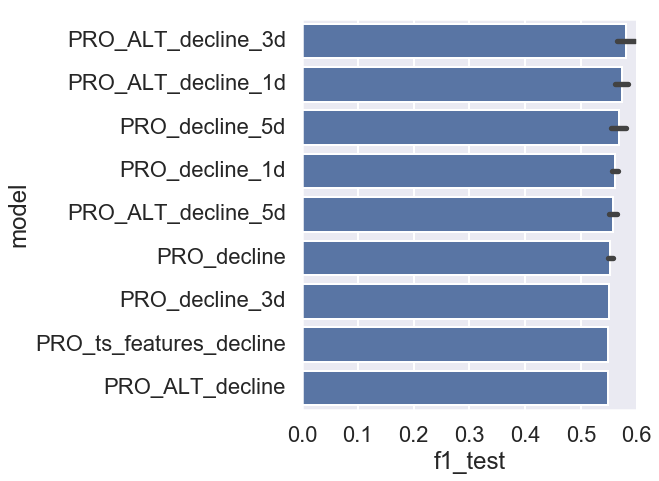

In [51]:
f, ax = plt.subplots(figsize=(6, 7))
sns.barplot(x="f1_test", y="model", data=stats_df.sort_values(by="f1_test").nlargest(columns="f1_test", n=20),
            label="Total", color="b")

C:\Users\wosnat\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


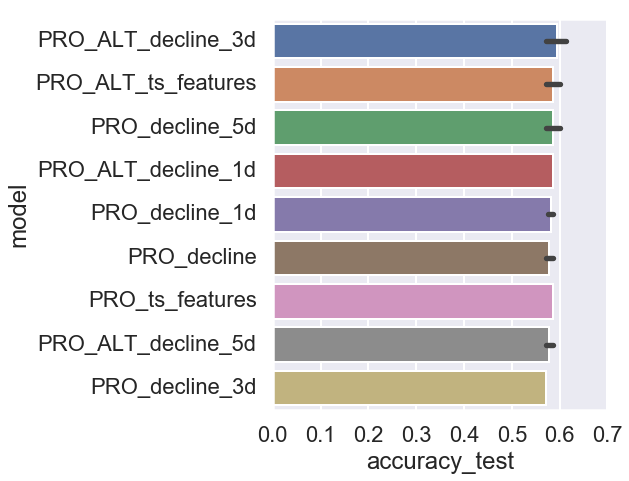

In [50]:
f, ax = plt.subplots(figsize=(6, 7))
v='accuracy_test'
sns.barplot(x=v, y="model", data=stats_df.sort_values(by=v).nlargest(columns=v, n=20),
            label=v)

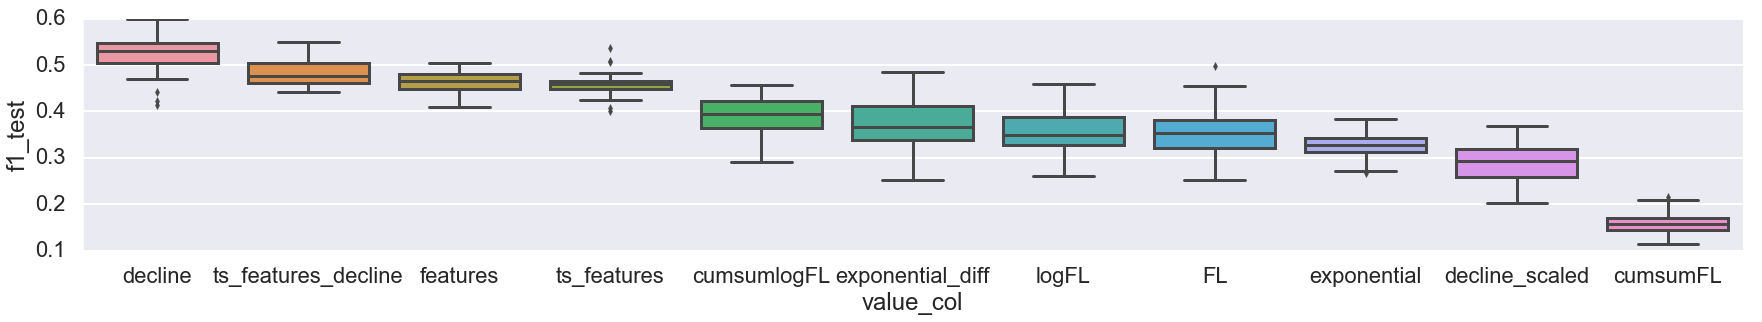

In [37]:
order = stats_df.loc[(stats_df.y_col.isin(['PRO', 'PRO_ALT'])) & (stats_df['cumsum'] == False)].groupby('value_col').f1_test.mean().sort_values(ascending=False).index
sns.catplot(data=stats_df.loc[(stats_df.y_col.isin(['PRO', 'PRO_ALT'])) & (stats_df['cumsum'] == False)], 
            x='value_col', y='f1_test', 
            #hue='resample_period', 
            #col='cumsum',
            #row='y_col', 
            aspect=5, kind='box',
            order=order,
           )


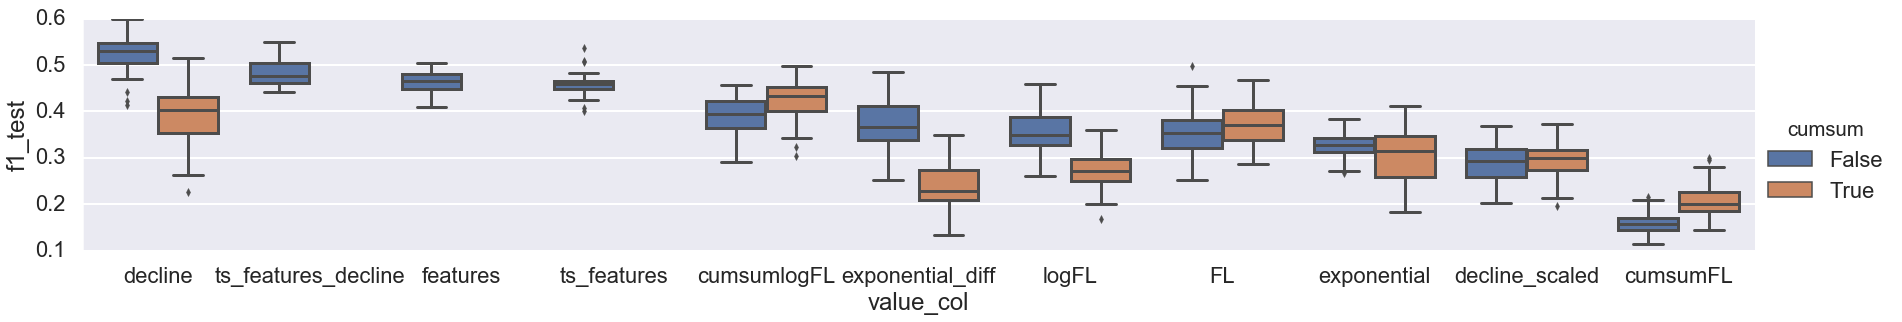

In [38]:
#order = stats_df.groupby('value_col').f1_test.mean().sort_values(ascending=False).index
sns.catplot(data=stats_df.loc[stats_df.y_col.isin(['PRO', 'PRO_ALT']) ], 
            x='value_col', y='f1_test', 
            #hue='resample_period', 
            #col='cumsum',
            #row='y_col', 
            aspect=5, kind='box',
            order=order,
            hue='cumsum'
           )


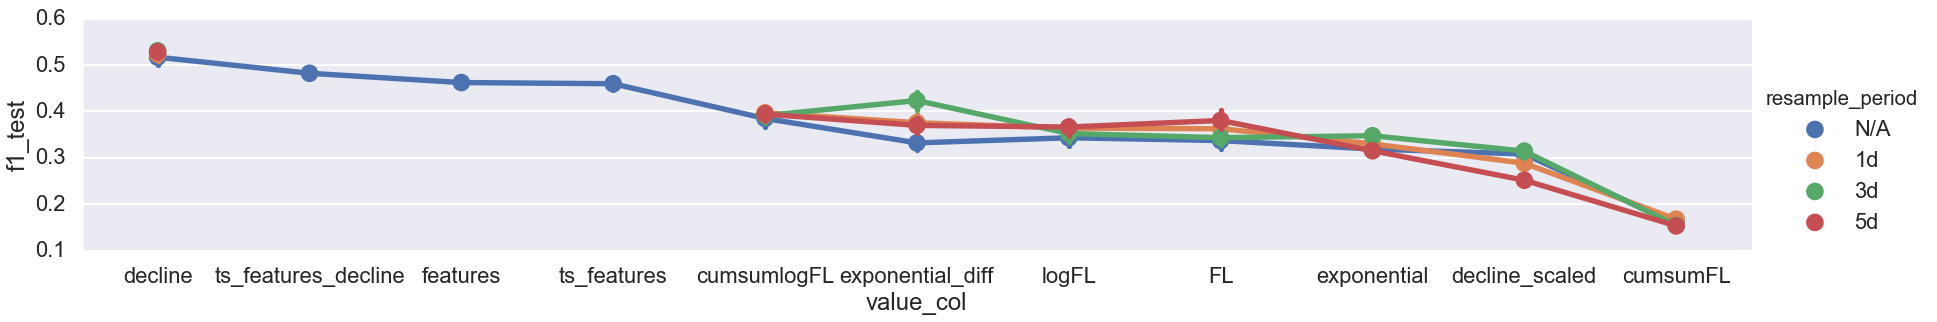

In [39]:
sns.catplot(data=stats_df.loc[stats_df.y_col.isin(['PRO', 'PRO_ALT']) & (stats_df['cumsum'] == False)], 
            x='value_col', y='f1_test', 
            hue='resample_period', 
            #col='cumsum',
            #row='y_col', 
            aspect=5, kind='point',
            order=order
           )


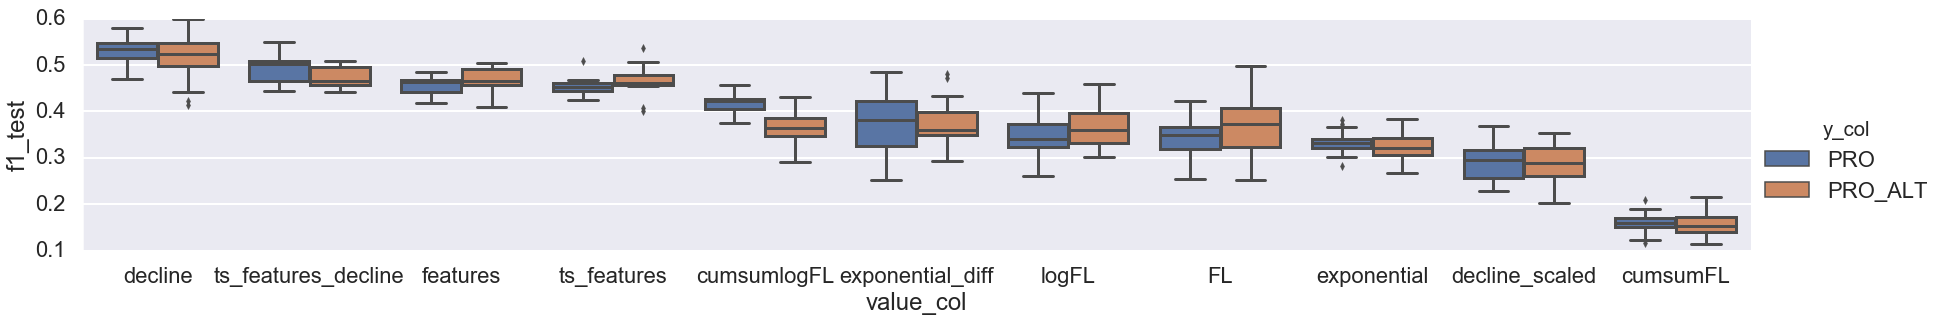

In [45]:
sns.catplot(data=stats_df.loc[stats_df.y_col.isin(['PRO', 'PRO_ALT']) & (stats_df['cumsum'] == False)], 
            x='value_col', y='f1_test', 
            #hue='resample_period', 
            #col='cumsum',
            hue='y_col', 
            aspect=5, kind='box',
            order=order
           )


In [41]:
stats_df.groupby('value_col').f1_test.mean().sort_values(ascending=False).index

Index(['ts_features_decline', 'decline', 'features', 'ts_features',
       'cumsumlogFL', 'FL', 'exponential', 'exponential_diff', 'logFL',
       'decline_scaled', 'cumsumFL'],
      dtype='object', name='value_col')

In [42]:
stats_df.loc[:,['model', 'f1_test']].nlargest(columns=['f1_test'], n=15)

,model,f1_test
1342,PRO_ALT_decline_3d,0.599889
1348,PRO_ALT_decline_3d,0.592239
1289,PRO_ALT_decline_1d,0.584413
1380,PRO_decline_5d,0.580287
1267,PRO_decline_1d,0.567368
1343,PRO_ALT_decline_3d,0.564713
1263,PRO_decline_1d,0.564019
1406,PRO_ALT_decline_5d,0.563997
1347,PRO_ALT_decline_3d,0.562800
1288,PRO_ALT_decline_1d,0.561141


Text(0.5,0.98,'Progress per PRO (FL)')

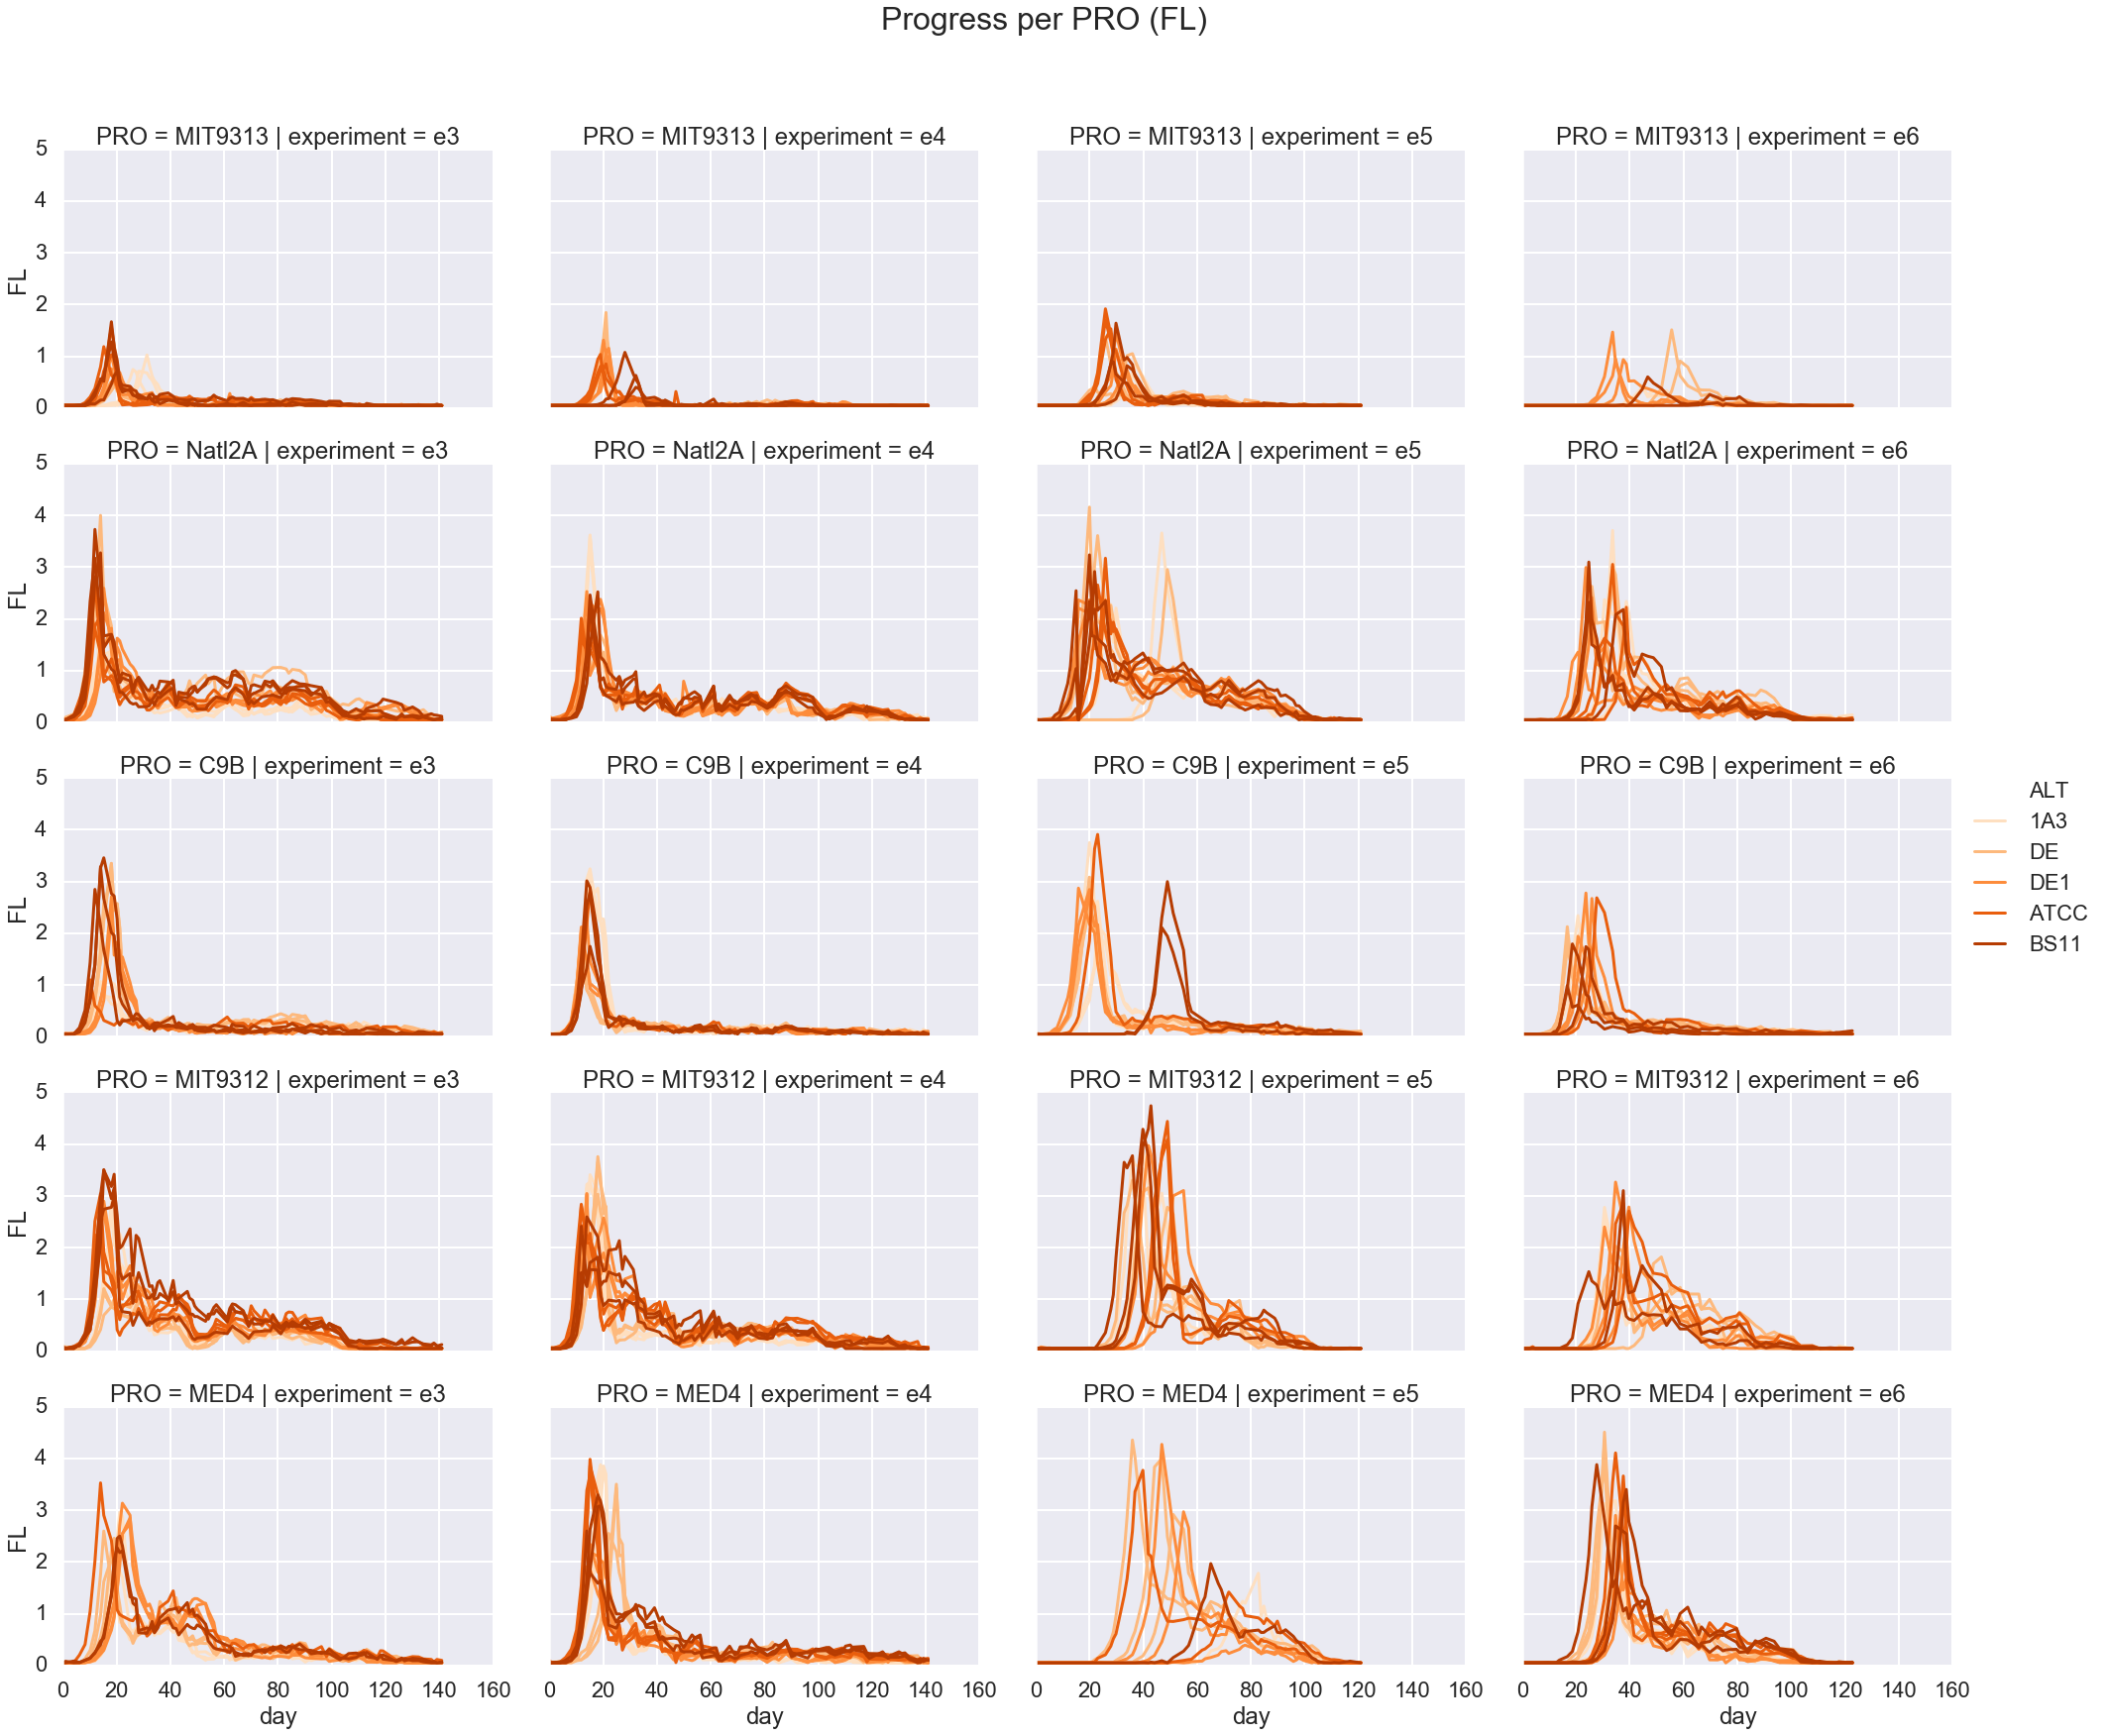

In [43]:
sns.relplot(data=dfc, x='day', y='FL', kind='line', #ci='sd',
#            col='PRO', hue='ALT', row='experiment', 
                           estimator=None, units='experiment_sample',
            row='PRO', hue='ALT', col='experiment', row_order=porder,

            palette=apallete, hue_order=aorder,
            aspect=1.4
           )
#plt.title("Progress per PRO")
plt.subplots_adjust(top=0.9)
plt.suptitle("Progress per PRO (FL)", fontsize=32)


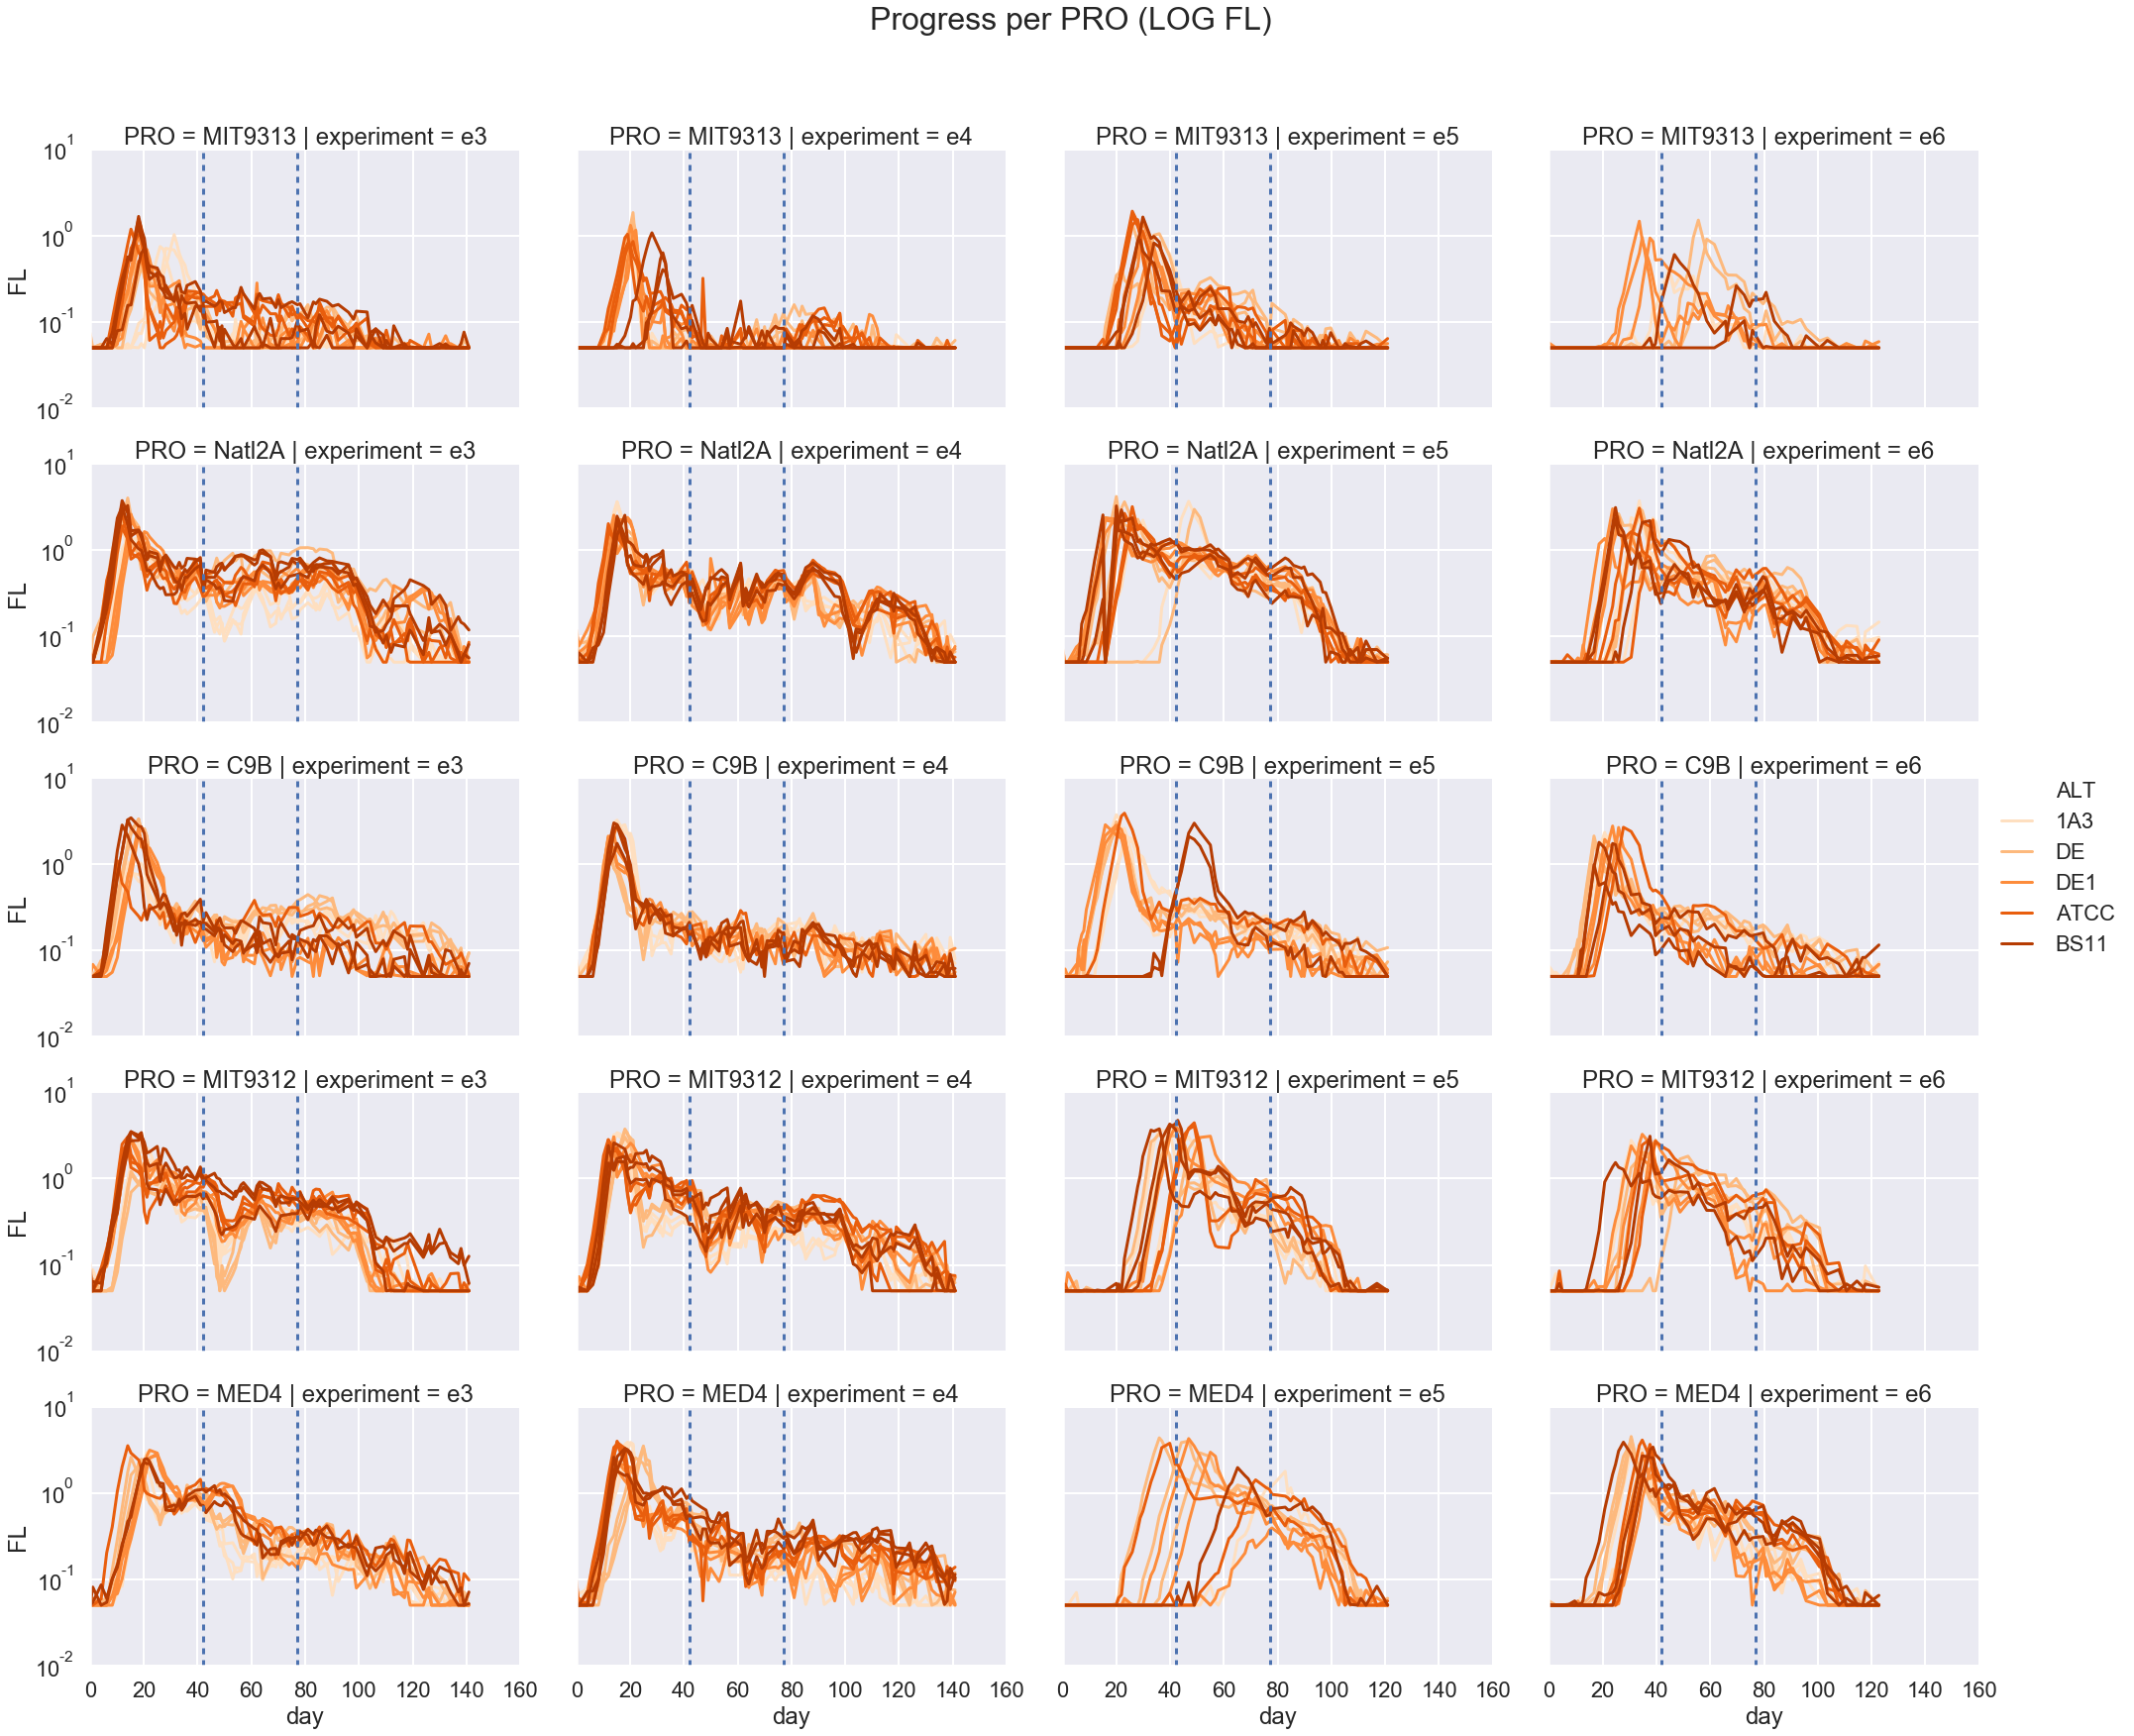

In [44]:
a= sns.relplot(data=dfc, x='day', y='FL', kind='line', 
               #ci='sd',
               estimator=None, units='experiment_sample',
            row='PRO', hue='ALT', col='experiment', row_order=porder,
            palette=apallete, hue_order=aorder,
            aspect=1.4
           )
a.fig.get_axes()[0].set_yscale('log')
for l in a.axes:
    for ax in l:
        ax.axvline(77, ls='--', label='17')
        ax.axvline(42, ls='--', label='23')
    
plt.subplots_adjust(top=0.9)
plt.suptitle("Progress per PRO (LOG FL)", fontsize=32)
plt.show()
